In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sqlite3
from scipy.stats.mstats import winsorize
sns.set_style('darkgrid')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()

In [3]:
# Initialize Basemap
import matplotlib.pyplot as plt
import matplotlib.cm
 
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

In [4]:
# View all columns on the screen
pd.set_option('max_columns', 100)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth',1000)

## Load in Data
---

In [5]:
query_string1 = '''
                select * from merged order by pickup_datetime asc
'''

In [6]:
# Connect to the existing fleetriskdb
con = sqlite3.connect('./DB/nyctaximergeddb.sqlite')
# Confirm data is being returned from this query
taxi_df = pd.read_sql_query(query_string1, con)
# Verify that result of SQL query is stored in the dataframe
taxi_df.tail()

,index,medallion,hack_license,vendor_id,rate_code,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
14064063,14100154,D10870DF96A6A201337FF2EF5B3D893D,287F30AEA8CF3242D100EC3CFF5BE2DA,CMT,1,2013-04-30 23:59:57,2013-05-01 00:03:37,1,219,1.0,-73.981850,40.783993,-73.991020,40.770947,CSH,5.5,0.5,0.5,0.00,0.0,6.50
14064064,14100155,CB0CF7051AAD729BD1F030EC42E3AAFB,69D7B9A38A419958A40EC9F299642F17,CMT,1,2013-04-30 23:59:58,2013-05-01 00:16:44,1,1006,4.2,-73.976997,40.761559,-74.003853,40.742271,CRD,14.5,0.5,0.5,2.00,0.0,17.50
14064065,14100156,1948C5FBB3E9E807D27074F528465F90,00C2CDB494E2163E6B83204FE5AAE516,CMT,1,2013-04-30 23:59:58,2013-05-01 00:02:52,2,173,0.6,-73.979881,40.776081,-73.982071,40.768272,CRD,4.0,0.5,0.5,1.00,0.0,6.00
14064066,14100157,A8262FA0AFCB6C7229F6888EAFBDE076,5F9351CC273E38A49A6CD691FFF5B980,CMT,1,2013-04-30 23:59:58,2013-05-01 00:06:38,1,399,1.7,-73.942482,40.779572,-73.942482,40.779572,CRD,7.5,0.5,0.5,1.11,0.0,9.61
14064067,14100158,CC75E7B29C4D32F9A45F6582F448C789,1BC47AA485CD2C61E65A2CA57C690918,CMT,1,2013-04-30 23:59:58,2013-05-01 00:07:16,1,438,1.7,-73.998215,40.729637,-73.992798,40.748791,CSH,7.5,0.5,0.5,0.00,0.0,8.50


In [7]:
con.close()

In [8]:
taxi_df.describe()

,index,rate_code,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
count,1.406407e+07,1.406407e+07,1.406407e+07,1.406407e+07,1.406407e+07,1.406407e+07,1.406407e+07,1.406407e+07,1.406407e+07,1.406407e+07,1.406407e+07,1.406407e+07,1.406407e+07,1.406407e+07,1.406407e+07
mean,7.050609e+06,1.003707e+00,1.712761e+00,6.989239e+02,2.432126e+00,-7.397875e+01,4.075286e+01,-7.397721e+01,4.075299e+01,1.092205e+01,3.313664e-01,4.998644e-01,1.208341e+00,1.465603e-01,1.310818e+01
std,4.070428e+06,2.141330e-01,1.390191e+00,4.602143e+02,2.251872e+00,2.343296e-02,2.298477e-02,2.391404e-02,2.567917e-02,6.653930e+00,3.691043e-01,8.232770e-03,1.676601e+00,8.787895e-01,8.117006e+00
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,-7.402698e+01,4.067001e+01,-7.402699e+01,4.067000e+01,2.500000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+00
25%,3.525829e+06,1.000000e+00,1.000000e+00,3.600000e+02,1.030000e+00,-7.399250e+01,4.073791e+01,-7.399175e+01,4.073737e+01,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,8.000000e+00
50%,7.050898e+06,1.000000e+00,1.000000e+00,6.000000e+02,1.700000e+00,-7.398222e+01,4.075420e+01,-7.398089e+01,4.075463e+01,9.000000e+00,5.000000e-01,5.000000e-01,1.000000e+00,0.000000e+00,1.080000e+01
75%,1.057580e+07,1.000000e+00,2.000000e+00,9.000000e+02,2.940000e+00,-7.396902e+01,4.076823e+01,-7.396660e+01,4.076878e+01,1.300000e+01,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,1.550000e+01
max,1.410016e+07,2.100000e+02,6.000000e+00,1.057600e+04,1.000000e+02,-7.385001e+01,4.085000e+01,-7.385001e+01,4.085000e+01,4.500100e+02,1.500000e+01,5.000000e-01,2.000000e+02,2.000000e+01,4.500100e+02


## Exploratory Data Analysis
---

In [9]:
# Max fare amount is $450 - let's investigate
taxi_df2 = taxi_df.copy()
taxi_df2[taxi_df2.fare_amount > 400]

,index,medallion,hack_license,vendor_id,rate_code,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
12342021,12374044,50296A056AF5D221536DC98ABB1E3274,A5E445844765D299EEFA07FF4B8F5A4C,CMT,5,2013-04-27 03:22:05,2013-04-27 03:23:21,1,76,0.4,-73.967026,40.754944,-73.9683,40.755051,CSH,450.01,0.0,0.0,0.0,0.0,450.01


Using the data dictionary here: http://www.nyc.gov/html/tlc/html/passenger/taxicab_rate.shtml 

* Rate Code 1 = Standard City Rate
* Rate Code 2 = JFK Airport Rate
* Rate Code 3 = La Guardia Airport Rate
* Rate Code 4 = Westchester/Nassau County Rates
* Rate Code 5 = Out of City Rate with negotiated flat fare

How many other fares like this exist?

In [10]:
taxi_df2.rate_code.value_counts(normalize=True)*100

1      99.849361
4       0.063324
2       0.050178
5       0.027069
0       0.005425
3       0.004280
6       0.000249
210     0.000071
65      0.000014
206     0.000007
77      0.000007
9       0.000007
7       0.000007
Name: rate_code, dtype: float64

In [11]:
# Looking at Rate Code 5 seems suspect for any future modeling we might like to do.
taxi_df2[taxi_df2.rate_code == 5].sort_values('fare_amount')

,index,medallion,hack_license,vendor_id,rate_code,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
2159617,2165226,BE2039FF3AAADDC4D17B9148151F9220,EDB2DE00B2C4087FE570AF794D62F87B,CMT,5,2013-04-05 17:56:01,2013-04-05 18:08:22,1,740,2.00,-73.956261,40.768646,-73.976059,40.747341,CSH,2.50,0.0,0.5,0.00,0.00,3.00
4153006,4164360,0A84B25FD498B75D5DEDBC79858DAD07,20E3E6919A4F4BEB959AE2465E781B62,CMT,5,2013-04-10 01:00:00,2013-04-10 01:01:00,1,45,3.60,-74.001373,40.729240,-74.001389,40.729198,CRD,2.50,0.0,0.0,0.50,0.00,3.00
3672121,3682300,BE2039FF3AAADDC4D17B9148151F9220,EDB2DE00B2C4087FE570AF794D62F87B,CMT,5,2013-04-08 22:47:51,2013-04-08 23:05:46,2,1074,5.20,-73.987686,40.749546,-73.925377,40.766495,CSH,2.50,0.0,0.5,0.00,0.00,3.00
647973,649627,BCF1C6D7A4822EFEEDC9DF4A465A09D4,749261B5765FFD0A0297EE2B05B33556,CMT,5,2013-04-02 16:03:18,2013-04-02 16:28:24,1,1505,7.80,-73.956078,40.764233,-73.892159,40.762527,CSH,2.50,0.0,0.0,0.00,5.33,7.83
3982838,3993800,BE2039FF3AAADDC4D17B9148151F9220,EDB2DE00B2C4087FE570AF794D62F87B,CMT,5,2013-04-09 18:10:50,2013-04-09 18:35:48,1,1498,3.30,-73.981186,40.759071,-73.996605,40.722092,CSH,2.50,0.0,0.5,0.00,0.00,3.00
757799,759758,BE2039FF3AAADDC4D17B9148151F9220,EDB2DE00B2C4087FE570AF794D62F87B,CMT,5,2013-04-02 20:05:37,2013-04-02 20:17:05,1,687,2.70,-73.978188,40.762699,-73.973747,40.796291,CSH,2.50,0.0,0.5,0.00,0.00,3.00
2845696,2853748,BE2039FF3AAADDC4D17B9148151F9220,EDB2DE00B2C4087FE570AF794D62F87B,CMT,5,2013-04-06 23:38:46,2013-04-07 00:03:43,1,1496,1.90,-73.976479,40.765362,-73.997971,40.750584,CSH,2.50,0.0,0.5,0.00,0.00,3.00
2283042,2288941,BE2039FF3AAADDC4D17B9148151F9220,EDB2DE00B2C4087FE570AF794D62F87B,CMT,5,2013-04-05 21:44:01,2013-04-05 21:59:23,2,921,2.70,-73.982437,40.762341,-74.007408,40.741035,CSH,2.50,0.0,0.5,0.00,0.00,3.00
2366376,2372480,BE2039FF3AAADDC4D17B9148151F9220,EDB2DE00B2C4087FE570AF794D62F87B,CMT,5,2013-04-06 00:14:42,2013-04-06 00:26:36,2,714,3.00,-73.988960,40.745338,-73.957787,40.773682,CSH,2.50,0.0,0.5,0.00,0.00,3.00
2130088,2135603,BE2039FF3AAADDC4D17B9148151F9220,EDB2DE00B2C4087FE570AF794D62F87B,CMT,5,2013-04-05 16:31:46,2013-04-05 16:56:13,1,1467,2.70,-73.982903,40.771481,-74.003296,40.739208,CSH,2.50,0.0,0.5,0.00,0.00,3.00


In [12]:
# I pare this down to all city or the surrounding airports trips
taxi_df2 = taxi_df2[taxi_df2.rate_code < 4]
taxi_df2.shape[0]

14051304

In [13]:
taxi_df2.describe()

,index,rate_code,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
count,1.405130e+07,1.405130e+07,1.405130e+07,1.405130e+07,1.405130e+07,1.405130e+07,1.405130e+07,1.405130e+07,1.405130e+07,1.405130e+07,1.405130e+07,1.405130e+07,1.405130e+07,1.405130e+07,1.405130e+07
mean,7.051215e+06,1.000534e+00,1.712959e+00,6.989062e+02,2.431436e+00,-7.397875e+01,4.075286e+01,-7.397721e+01,4.075299e+01,1.091121e+01,3.314440e-01,4.999755e-01,1.207282e+00,1.456752e-01,1.309558e+01
std,4.070503e+06,2.697442e-02,1.390452e+00,4.600216e+02,2.249590e+00,2.342846e-02,2.298445e-02,2.390756e-02,2.567681e-02,6.601285e+00,3.690962e-01,3.498608e-03,1.670389e+00,8.735230e-01,8.059507e+00
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,-7.402698e+01,4.067001e+01,-7.402698e+01,4.067000e+01,2.500000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
25%,3.526388e+06,1.000000e+00,1.000000e+00,3.600000e+02,1.030000e+00,-7.399250e+01,4.073791e+01,-7.399174e+01,4.073737e+01,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,8.000000e+00
50%,7.051908e+06,1.000000e+00,1.000000e+00,6.000000e+02,1.700000e+00,-7.398222e+01,4.075420e+01,-7.398089e+01,4.075463e+01,9.000000e+00,5.000000e-01,5.000000e-01,1.000000e+00,0.000000e+00,1.080000e+01
75%,1.057654e+07,1.000000e+00,2.000000e+00,9.000000e+02,2.940000e+00,-7.396902e+01,4.076823e+01,-7.396659e+01,4.076877e+01,1.300000e+01,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,1.550000e+01
max,1.410016e+07,3.000000e+00,6.000000e+00,1.057600e+04,1.000000e+02,-7.385001e+01,4.085000e+01,-7.385001e+01,4.085000e+01,2.040000e+02,5.500000e+00,5.000000e-01,2.000000e+02,2.000000e+01,2.285000e+02


In [14]:
taxi_df2[taxi_df2.fare_amount == taxi_df2.fare_amount.max()]

,index,medallion,hack_license,vendor_id,rate_code,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
6576499,6594151,56EC8E3AA6218867A1341249F26531F3,59E86EC8FFE3A4941A7F6E6219A8A99A,CMT,1,2013-04-14 22:22:06,2013-04-15 00:51:24,1,8957,73.3,-73.980591,40.758259,-73.978142,40.757458,CSH,204.0,0.5,0.5,0.0,0.0,205.0


In [15]:
# Nearly 2.5 hour trip over 73 miles, paid by cash - seems legit
8957/3600.

2.4880555555555555

In [16]:
# No negative trip distances
taxi_df2[taxi_df2.trip_distance < 0].shape[0]

0

In [17]:
# Let's create a feature to determine the speed of taxicabs.
taxi_df2['speed'] = 1.0*taxi_df2.trip_distance/(taxi_df2.trip_time_in_secs/3600.0)
taxi_df2.speed.max()

74880.0

In [18]:
# Ridiculous - let's curb that maximum speed to be 200mph
taxi_df2 = taxi_df2[taxi_df2.speed < 200.0]

In [19]:
# 14 million trips
taxi_df2.shape[0]

14045346

In [20]:
# Two primary taxi vendors
#taxi_df.groupby('vendor_id')['medallion'].nunique()#.plot(kind='bar', color=[['yellow','black']])
#None

In [21]:
# 13,269 Taxis
taxi_df2.medallion.nunique()

13269

In [22]:
# 32,846 Drivers
taxi_df2.hack_license.nunique()

32845

In [23]:
# 34 million miles
taxi_df2.trip_distance.sum()

34103079.150000066

In [24]:
# $184 million
taxi_df2.total_amount.sum()

183943548.74000013

## 1. What is the distribution of the number of passengers per trip?

In [25]:
taxi_df2.passenger_count.value_counts()

1    9952165
2    1836965
5     837302
6     572004
3     569794
4     277116
Name: passenger_count, dtype: int64

In [26]:
taxi_df2.passenger_count.describe()

count    1.404535e+07
mean     1.713199e+00
std      1.390663e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      6.000000e+00
Name: passenger_count, dtype: float64

In [27]:
taxi_df2.passenger_count.mode()

0    1
dtype: int64

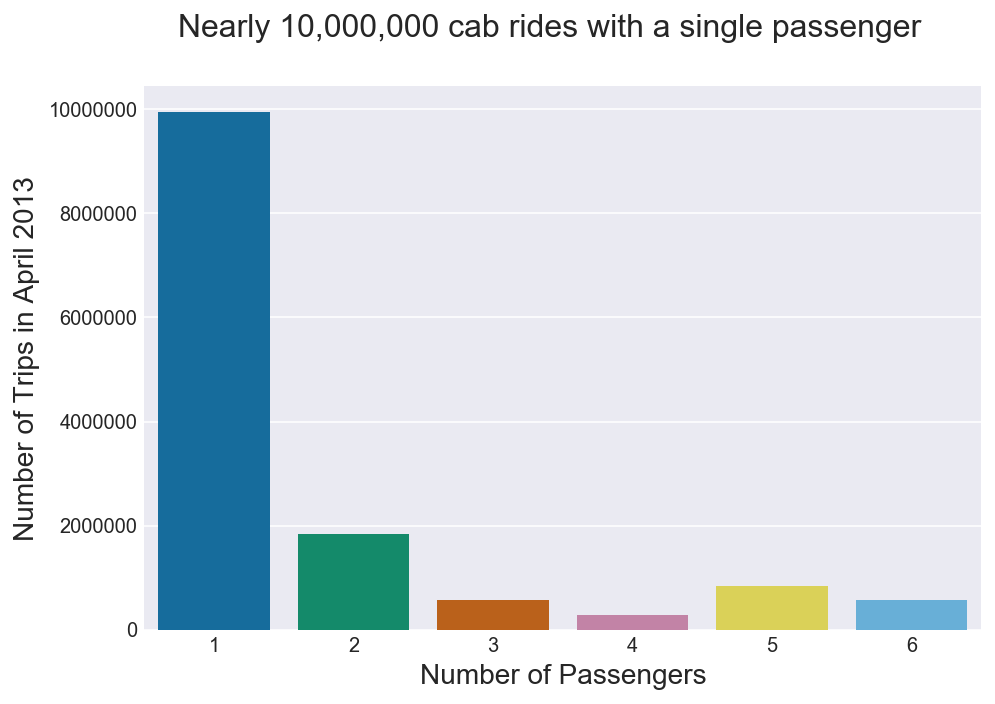

In [28]:
fig, ax = plt.subplots(figsize=(7.5,5))
fig.suptitle('Nearly 10,000,000 cab rides with a single passenger', fontsize=16)
ax = sns.countplot(x='passenger_count', data = taxi_df2, palette = 'colorblind', ax=ax)
ax.set_xlabel('Number of Passengers', fontsize=14)
ax.set_ylabel('Number of Trips in April 2013', fontsize=14)
plt.ticklabel_format(style='plain', axis='y')
None

## 2. What is the distribution of payment type?

In [29]:
a = taxi_df.payment_type.value_counts(normalize=True)
a = a.to_frame().reset_index()
a = a.rename(columns={'index':'Type', 'payment_type':'Frequency'})
a_df = a
a_df

,Type,Frequency
0,CRD,0.538956
1,CSH,0.461044


In [30]:
# Could have used a dictionary here instead
a_df = a_df.replace('CRD','Credit Card')
a_df = a_df.replace('CSH','Cash')
#a_df = a_df.replace('NOC','No Charge')
#a_df = a_df.replace('DIS', 'Dispute')
#a_df = a_df.replace('UNK','Unknown')
a_df.set_index('Type', inplace=True)

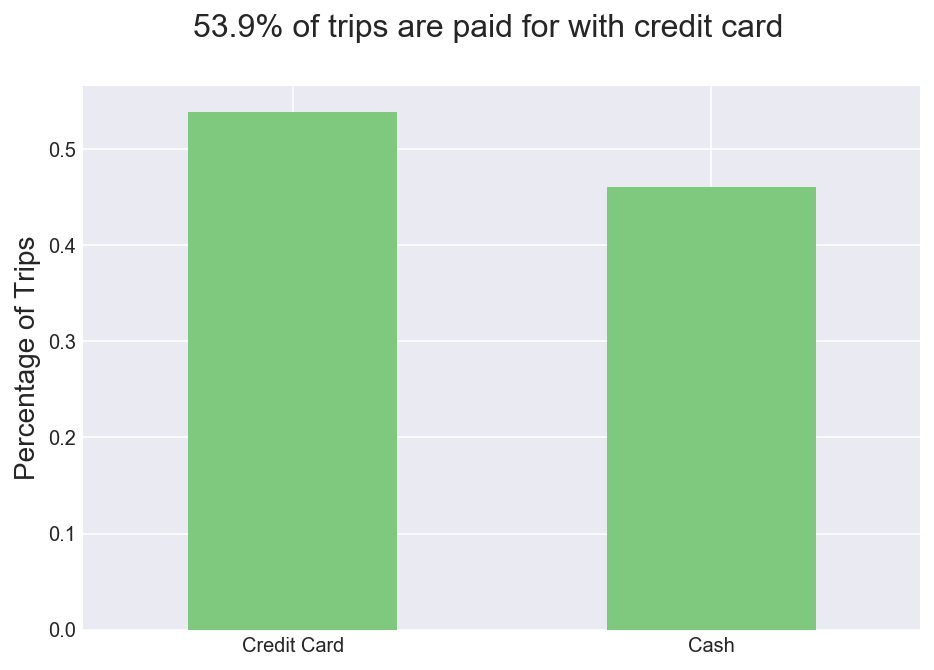

In [31]:
fig, ax = plt.subplots(figsize=(7.5,5))
ax = a_df.plot(kind='bar', cmap='Accent', legend=False, rot=0, ax=ax)
ax.set_xlabel('')
ax.set_ylabel('Percentage of Trips', fontsize=14)
fig.suptitle('53.9% of trips are paid for with credit card', fontsize=16)
plt.ticklabel_format(style='plain', axis='y')
None

## 3. What is the distribution of the fare amount?
---
## 3.1 All Fares

In [32]:
taxi_df2.fare_amount.max()

204.0

In [33]:
taxi_df2.fare_amount.min()

2.5

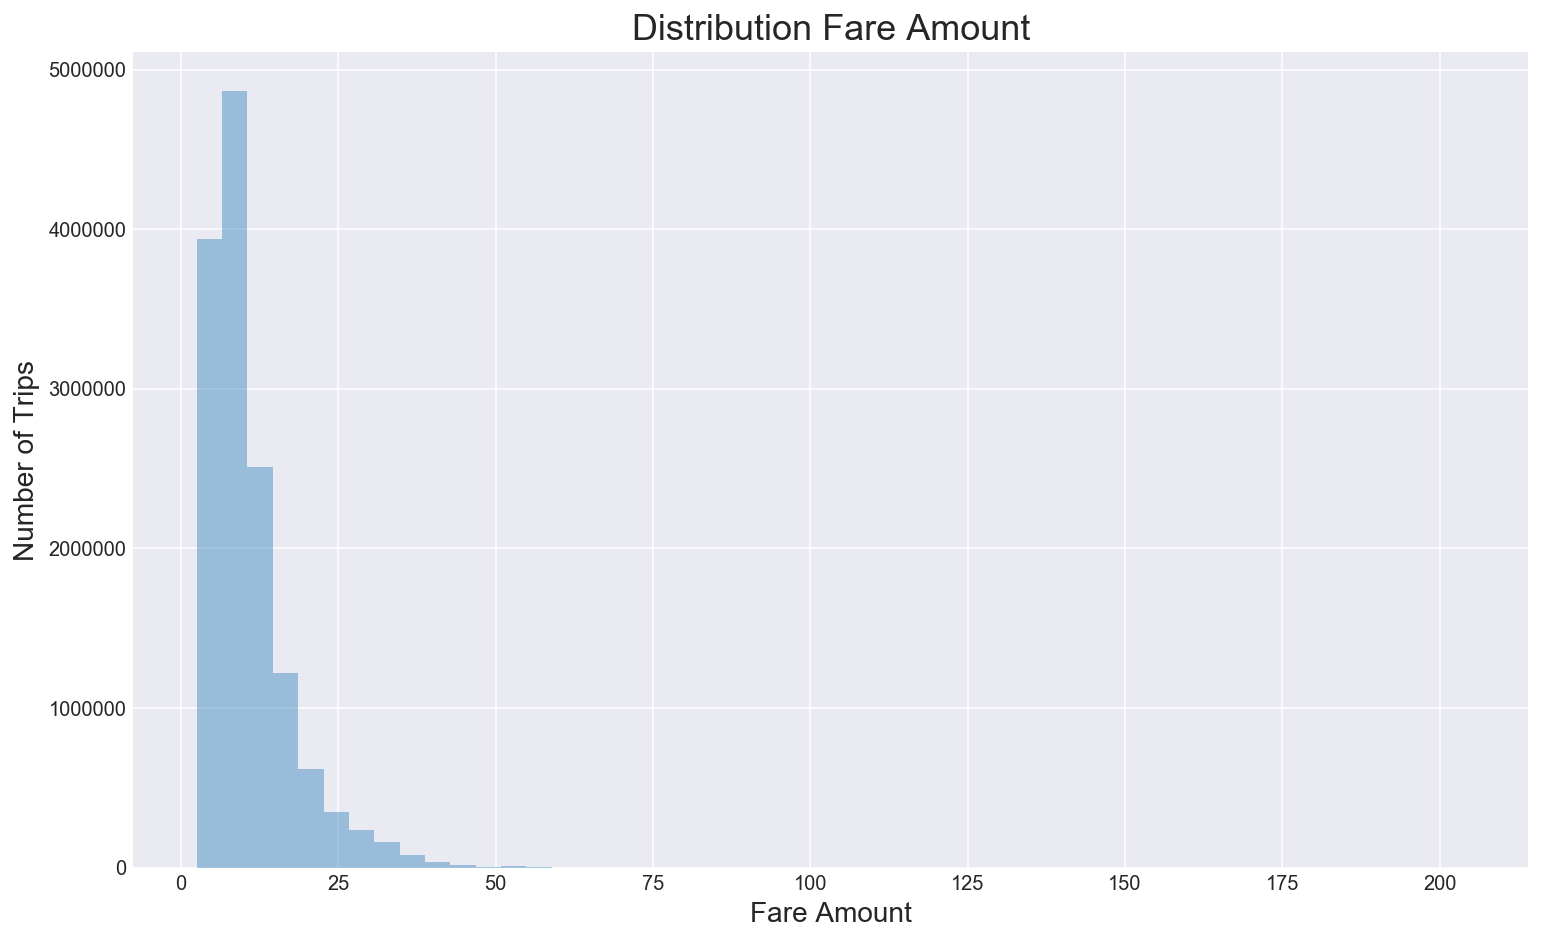

In [34]:
(fig, ax) = plt.subplots(figsize=(12.5,7.5))
ax = sns.distplot(taxi_df2.fare_amount, kde=False)
#ax.axvline(fare_amt_median, lw=2.5, ls='dashed', color='black')
#ax.axvline(fare_amt_lower, lw=2.5, color='darkgoldenrod', ls='dashed')
#ax.axvline(fare_amt_upper, lw=2.5, color='darkgoldenrod', ls='dashed')
ax.set_title('Distribution Fare Amount', fontsize=18)
ax.set_xlabel('Fare Amount', fontsize=14)
ax.set_ylabel('Number of Trips', fontsize=14)
None

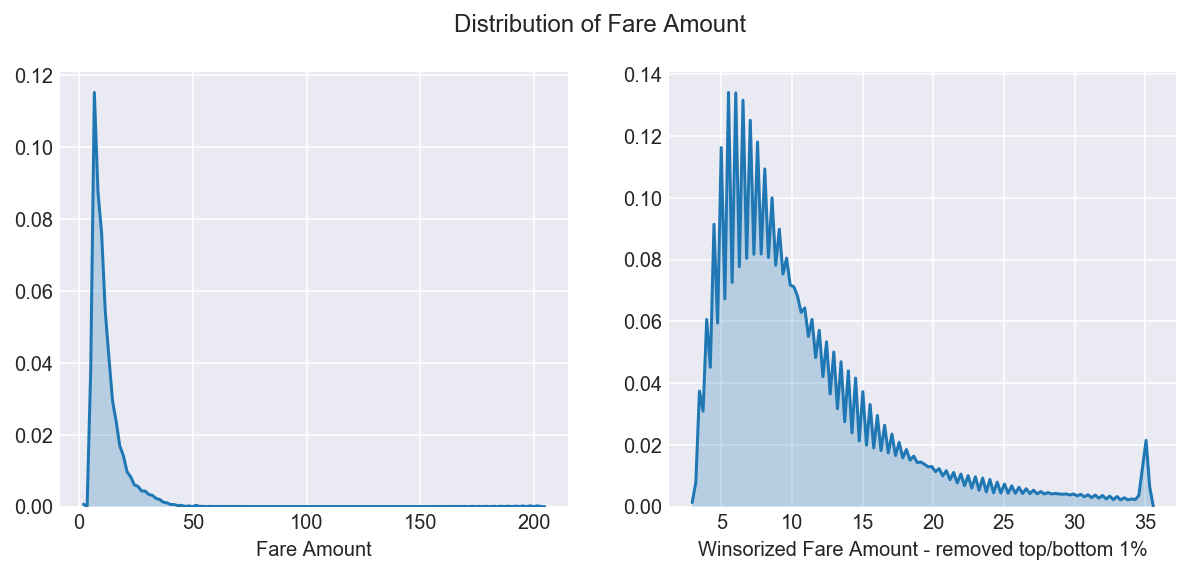

In [35]:
(fig, ax) = plt.subplots(1,2, figsize=(10,4))
ax[0] = sns.kdeplot(taxi_df2.fare_amount, legend=False, ax=ax[0], shade=True)
# Remove top and bottom 1% of fare amounts
ax[1] = sns.kdeplot(winsorize(taxi_df2.fare_amount, limits=[0.01, 0.01]), legend=False, ax=ax[1], shade=True)
ax[0].set_xlabel('Fare Amount')
ax[1].set_xlabel('Winsorized Fare Amount - removed top/bottom 1%')
fig.suptitle('Distribution of Fare Amount')
None

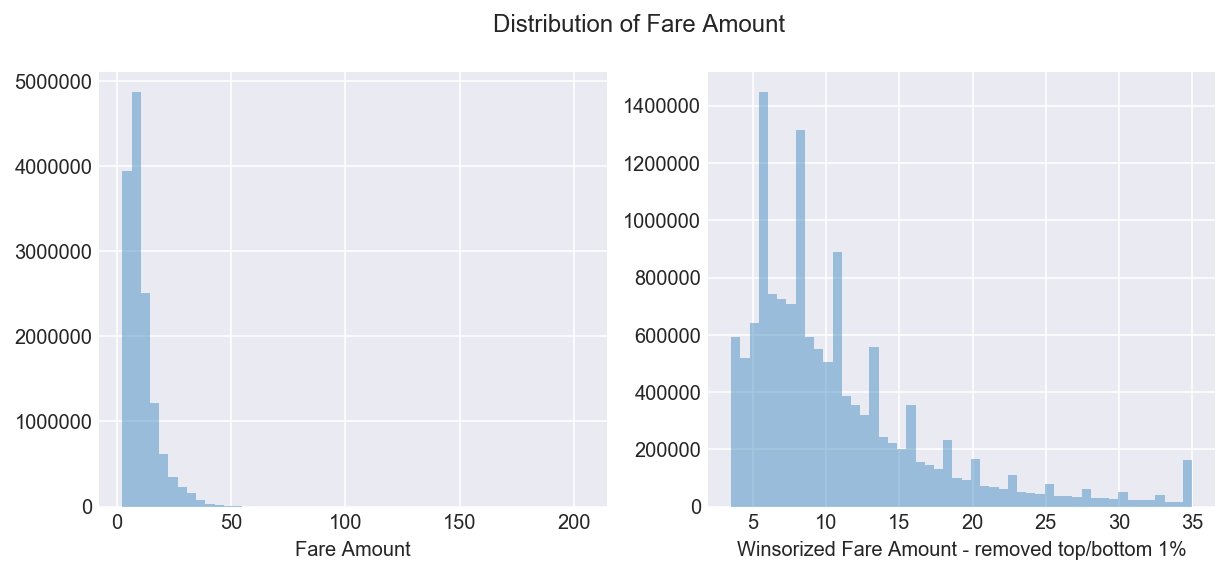

In [36]:
(fig, ax) = plt.subplots(1,2, figsize=(10,4))
ax[0] = sns.distplot(taxi_df2.fare_amount, ax=ax[0], kde=False)
# Remove top and bottom 1% of fare amounts
ax[1] = sns.distplot(winsorize(taxi_df2.fare_amount, limits=[0.01, 0.01]), ax=ax[1], kde=False)
ax[0].set_xlabel('Fare Amount')
ax[1].set_xlabel('Winsorized Fare Amount - removed top/bottom 1%')
fig.suptitle('Distribution of Fare Amount')
None

In [37]:
winsorized_fare_amt = winsorize(taxi_df2.fare_amount, limits=[0.01, 0.01])
fare_amt_median = np.median(winsorized_fare_amt)

fare_amt_lower = stats.scoreatpercentile(winsorized_fare_amt, 5)
fare_amt_upper = stats.scoreatpercentile(winsorized_fare_amt, 95)

print fare_amt_lower, fare_amt_median, fare_amt_upper

4.5 9.0 24.5


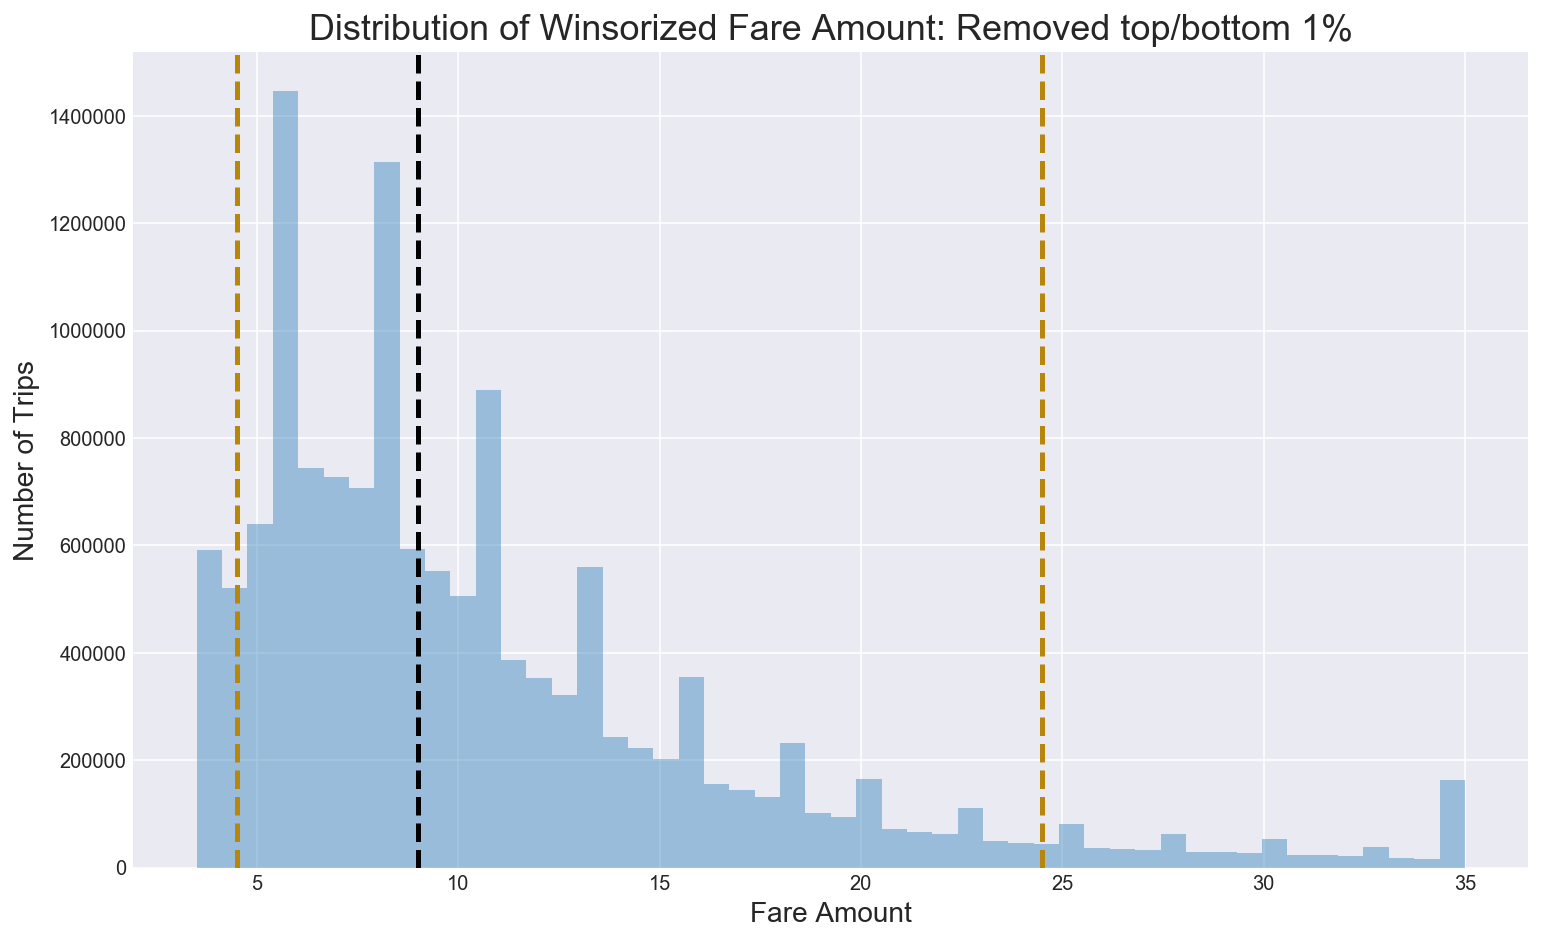

In [38]:
(fig, ax) = plt.subplots(figsize=(12.5,7.5))
ax = sns.distplot(winsorized_fare_amt, kde=False)
ax.axvline(fare_amt_median, lw=2.5, ls='dashed', color='black')
ax.axvline(fare_amt_lower, lw=2.5, color='darkgoldenrod', ls='dashed')
ax.axvline(fare_amt_upper, lw=2.5, color='darkgoldenrod', ls='dashed')
ax.set_title('Distribution of Winsorized Fare Amount: Removed top/bottom 1%', fontsize=18)
ax.set_xlabel('Fare Amount', fontsize=14)
ax.set_ylabel('Number of Trips', fontsize=14)
None

## 3.2 Airport Fares
---

In [39]:
airport_fare = taxi_df2.copy()
airport_fare = airport_fare[airport_fare.rate_code <> 1]
airport_fare.head()

,index,medallion,hack_license,vendor_id,rate_code,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,speed
97,98,81C4DF9BA06C93EDCC87F6702E0B22F5,51FA34275A96BB8C216F2CBA8A18D0C9,CMT,2,2013-04-01 00:00:13,2013-04-01 00:07:25,1,431,1.70,-73.988914,40.718857,-74.007393,40.733482,CSH,52.0,0.0,0.5,0.0,0.00,52.50,14.199536
3072,3087,D147E34985C6C53EB978954C12667FDA,EE3B97473E38E69D0216927005CE3172,CMT,2,2013-04-01 00:18:10,2013-04-01 00:27:22,1,552,2.10,-73.987267,40.744686,-73.992851,40.721375,CSH,52.0,0.0,0.5,0.0,0.00,52.50,13.695652
3309,3325,5DFA10705410FA86ECFC6447038BF228,24D86F1D5547AE45D4E5FD79D8949064,VTS,2,2013-04-01 00:20:00,2013-04-01 00:32:00,2,720,8.75,-73.857826,40.736092,-73.997910,40.718147,CSH,52.0,0.0,0.5,0.0,0.00,52.50,43.750000
3551,3568,D932DC772B89F69D30F03FB095424F97,F5AE2E36090433DFE4142AFC19AFD495,CMT,2,2013-04-01 00:21:43,2013-04-01 00:35:24,1,820,12.20,-73.905167,40.768223,-73.958923,40.763676,CRD,52.0,0.0,0.5,3.0,5.33,60.83,53.560976
4233,4251,91E435E93E0C66BCEC7CE9164900CFF8,ABE08BCFEBF3F5F7339CA2170EEC1DEE,CMT,2,2013-04-01 00:26:47,2013-04-01 00:27:30,2,43,0.20,-73.975266,40.745609,-73.978210,40.741783,CRD,52.0,0.0,0.5,10.0,5.33,67.83,16.744186


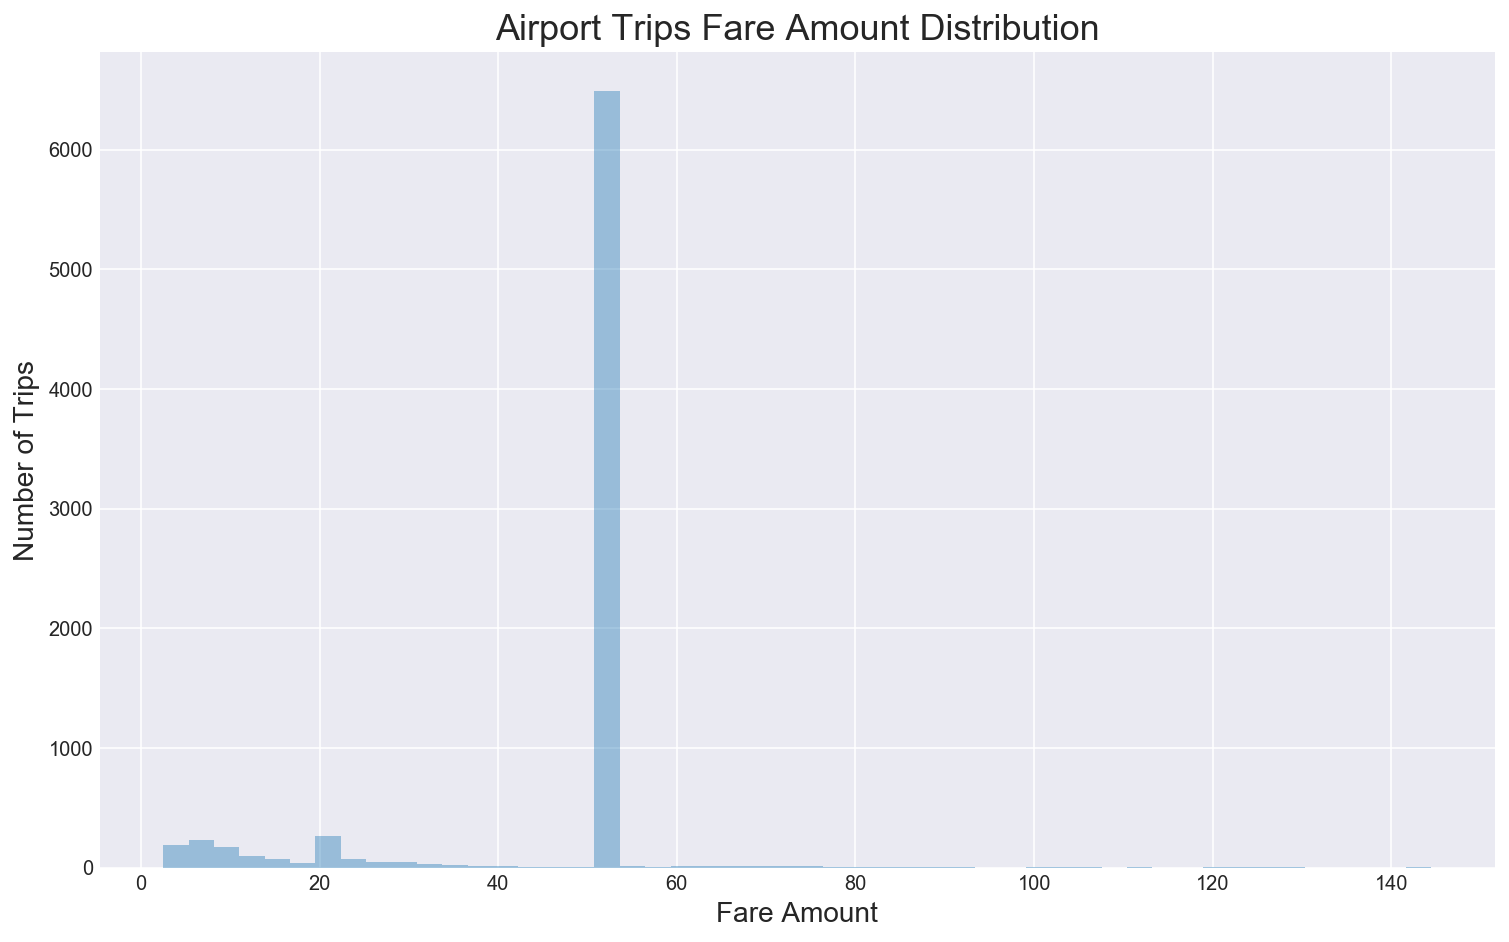

In [40]:
(fig, ax) = plt.subplots(figsize=(12.5,7.5))
ax = sns.distplot(airport_fare.fare_amount, kde=False)
ax.set_title('Airport Trips Fare Amount Distribution', fontsize=18)
ax.set_xlabel('Fare Amount', fontsize=14)
ax.set_ylabel('Number of Trips', fontsize=14)
None

In [41]:
winsorized_airport_fare_amt = winsorize(airport_fare.fare_amount, limits=[0.01, 0.01])
airport_fare_amt_median = np.median(winsorized_airport_fare_amt)

airport_fare_amt_lower = stats.scoreatpercentile(winsorized_airport_fare_amt, 5)
airport_fare_amt_upper = stats.scoreatpercentile(winsorized_airport_fare_amt, 95)

print airport_fare_amt_lower, airport_fare_amt_median, airport_fare_amt_upper

8.0 52.0 52.0


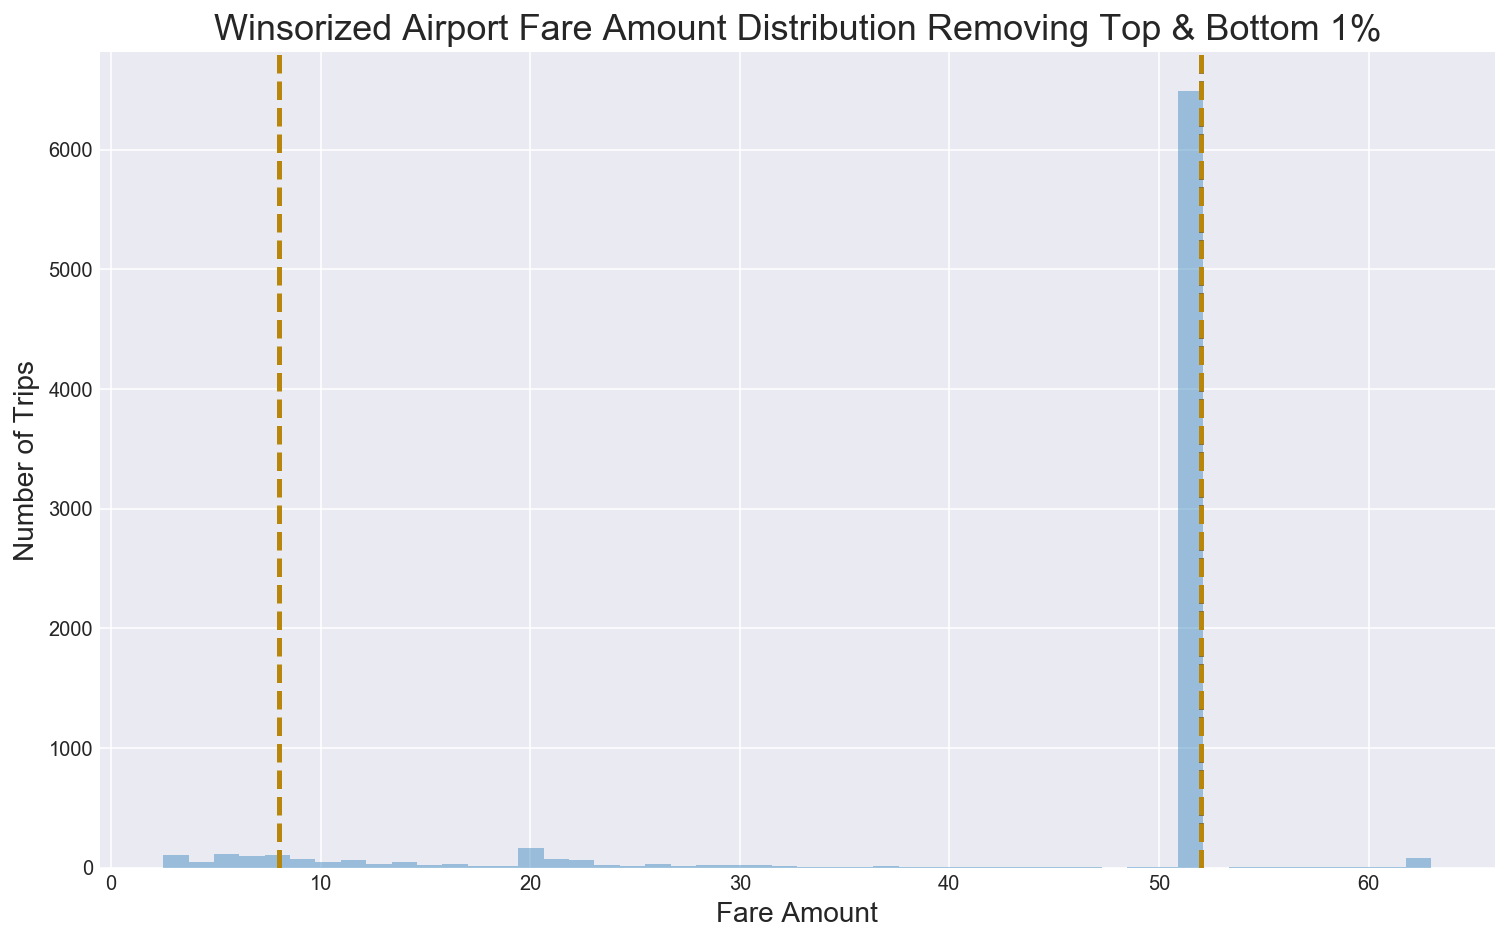

In [113]:
(fig, ax) = plt.subplots(figsize=(12.5,7.5))
ax = sns.distplot(winsorized_airport_fare_amt, kde=False)
ax.axvline(airport_fare_amt_median, lw=2.5, ls='dashed', color='black')
ax.axvline(airport_fare_amt_lower, lw=2.5, color='darkgoldenrod', ls='dashed')
ax.axvline(airport_fare_amt_upper, lw=2.5, color='darkgoldenrod', ls='dashed')
ax.set_title('Winsorized Airport Fare Amount Distribution Removing Top & Bottom 1%', fontsize=18)
ax.set_xlabel('Fare Amount', fontsize=14)
ax.set_ylabel('Number of Trips', fontsize=14)
None

## 3.3 Non-Airport Fares
---

In [43]:
nonairport_fare = taxi_df2.copy()
nonairport_fare = nonairport_fare[nonairport_fare.rate_code == 1]
nonairport_fare.head()

,index,medallion,hack_license,vendor_id,rate_code,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,speed
0,0,52BC28EAABDDC48741F825000D738850,DA77BDC1BC5CFD0E31613E7E2FF4EA24,CMT,1,2013-04-01 00:00:00,2013-04-01 00:10:32,1,632,3.40,-73.993500,40.746933,-73.956322,40.773064,CRD,12.0,0.5,0.5,2.6,0.0,15.6,19.367089
1,1,B8733215A7E6A22EB832EEAEA731D3CB,66707B80913E62642A6C2E0BFEE45955,VTS,1,2013-04-01 00:00:00,2013-04-01 00:35:00,1,2100,10.29,-73.917908,40.770863,-73.899574,40.754028,CSH,34.0,0.5,0.5,0.0,0.0,35.0,17.640000
2,2,D80FD255D1921207A256F30136F4DBB2,871954A11B0687C7C43B0E782AAEC9F1,VTS,1,2013-04-01 00:00:00,2013-04-01 00:04:00,4,240,0.97,-73.959290,40.719727,-73.966736,40.710716,CRD,5.0,0.5,0.5,1.1,0.0,7.1,14.550000
3,3,23966E68120CC7347D4CE2FA60C133CD,EA554CB787C4BE0D1F90E9C5B2009A4F,VTS,1,2013-04-01 00:00:00,2013-04-01 00:06:00,1,360,1.69,-73.990929,40.760746,-74.003082,40.741711,CRD,7.5,0.5,0.5,2.0,0.0,10.5,16.900000
4,4,67541D5955294F42CC3044A0950ECE2F,379099329932F1F8D72CB0F2DAC17525,VTS,1,2013-04-01 00:00:00,2013-04-01 00:05:00,1,300,1.82,-73.970650,40.758587,-73.979584,40.737556,CRD,7.0,0.5,0.5,1.5,0.0,9.5,21.840000


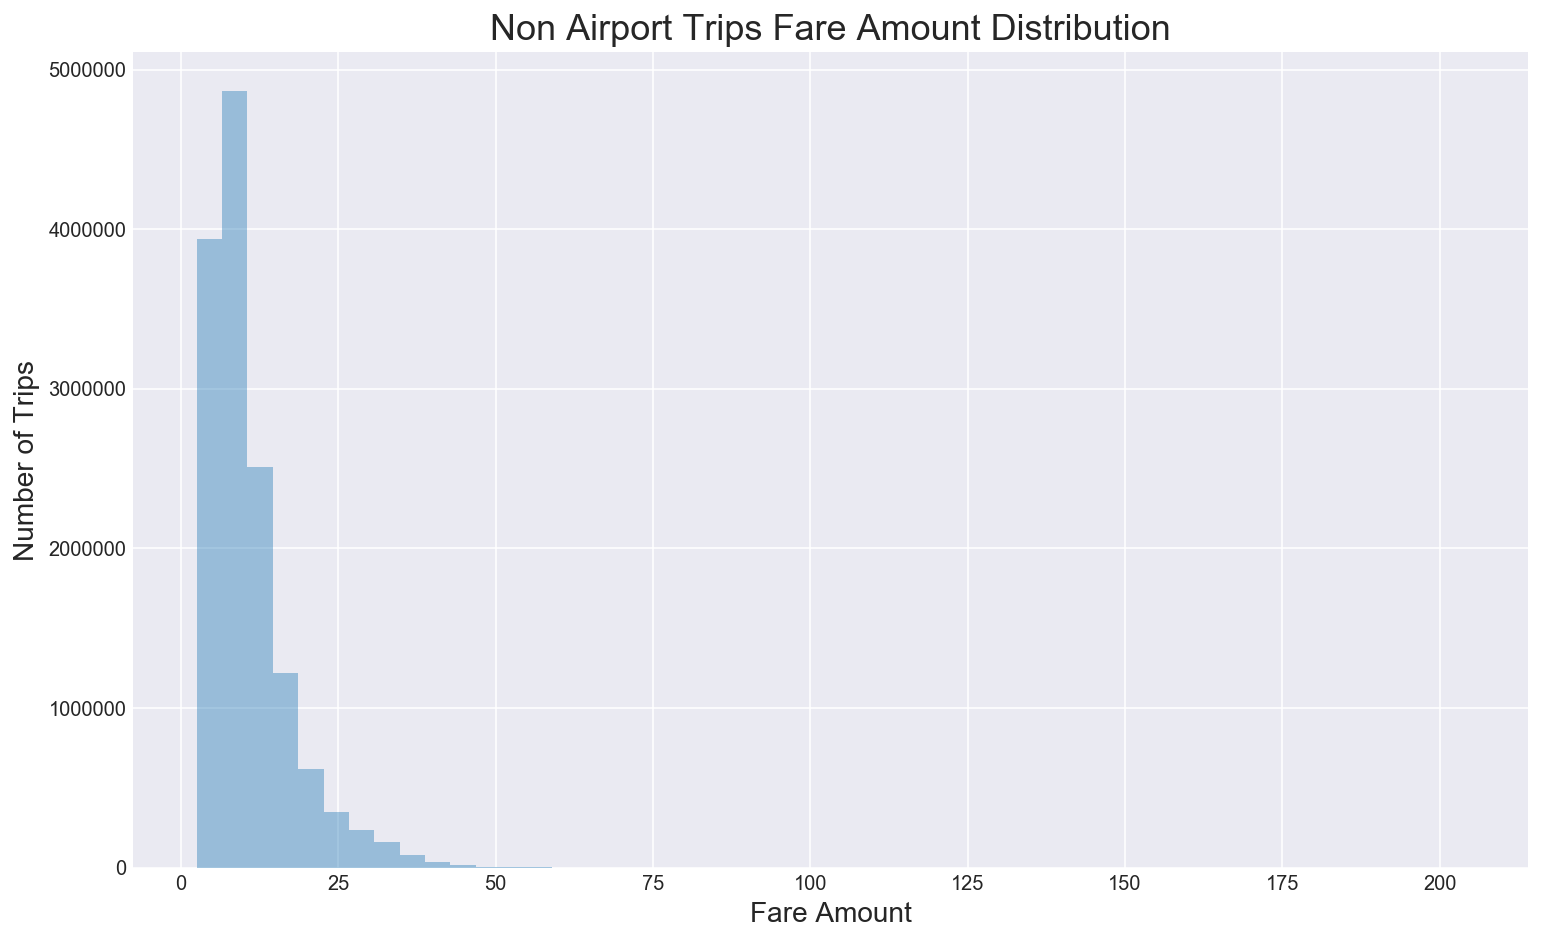

In [44]:
(fig, ax) = plt.subplots(figsize=(12.5,7.5))
ax = sns.distplot(nonairport_fare.fare_amount, kde=False)
ax.set_title('Non Airport Trips Fare Amount Distribution', fontsize=18)
ax.set_xlabel('Fare Amount', fontsize=14)
ax.set_ylabel('Number of Trips', fontsize=14)
None

In [45]:
winsorized_nonairport_fare_amt = winsorize(nonairport_fare.fare_amount, limits=[0.01, 0.01])
nonairport_fare_amt_median = np.median(winsorized_nonairport_fare_amt)

nonairport_fare_amt_lower = stats.scoreatpercentile(winsorized_nonairport_fare_amt, 5)
nonairport_fare_amt_upper = stats.scoreatpercentile(winsorized_nonairport_fare_amt, 95)

print nonairport_fare_amt_lower, nonairport_fare_amt_median, nonairport_fare_amt_upper

4.5 9.0 24.5


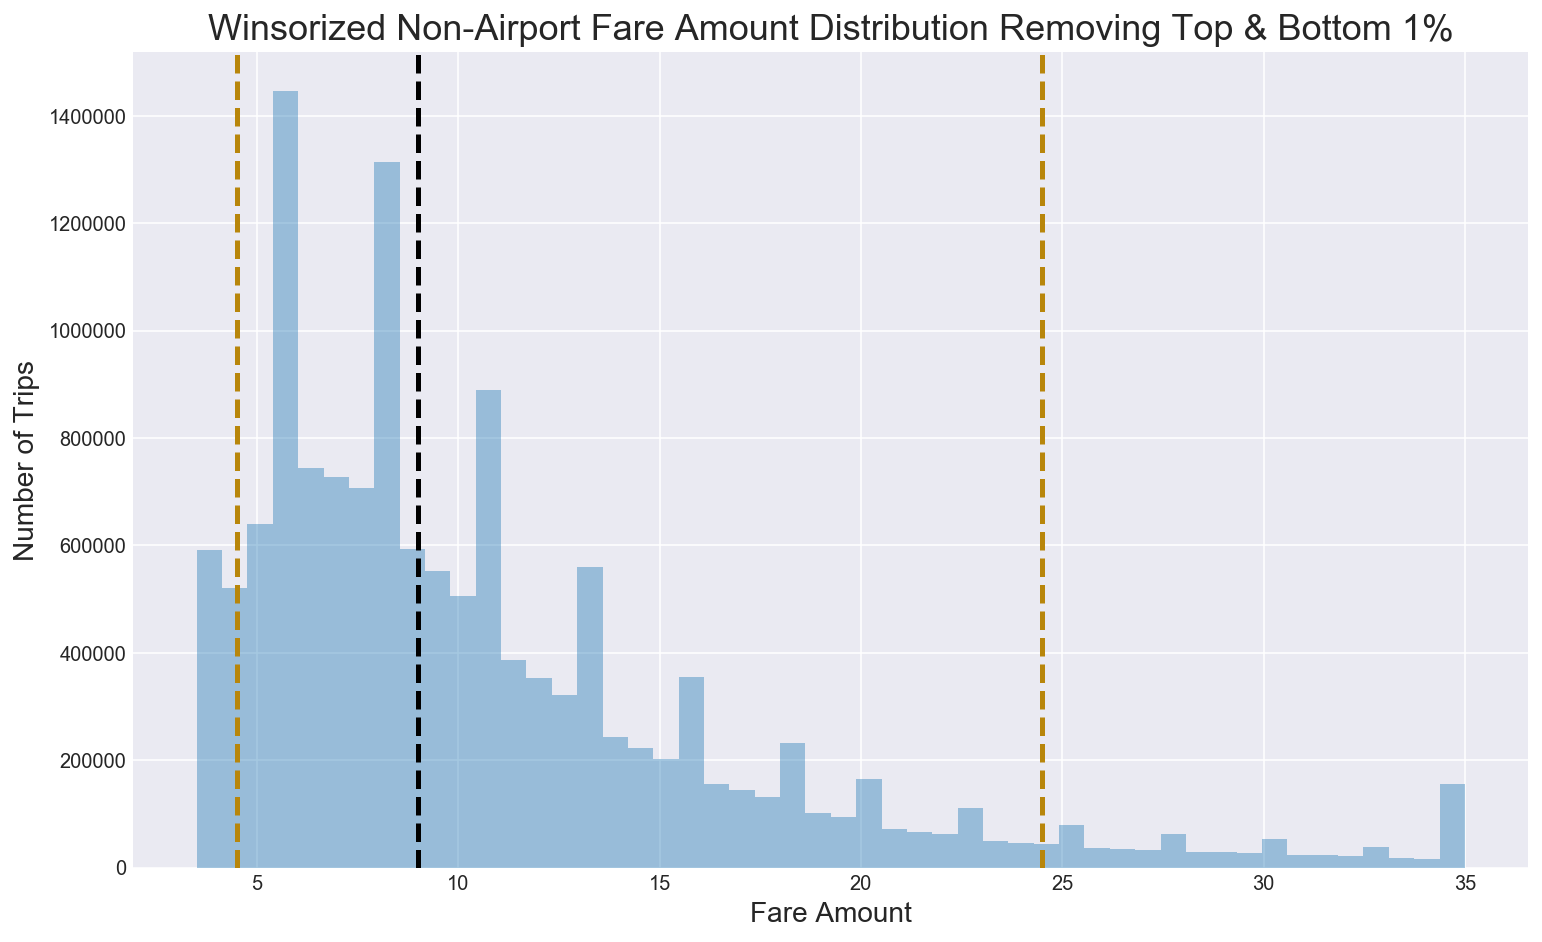

In [46]:
(fig, ax) = plt.subplots(figsize=(12.5,7.5))
ax = sns.distplot(winsorized_nonairport_fare_amt, kde=False)
ax.axvline(fare_amt_median, lw=2.5, ls='dashed', color='black')
ax.axvline(fare_amt_lower, lw=2.5, color='darkgoldenrod', ls='dashed')
ax.axvline(fare_amt_upper, lw=2.5, color='darkgoldenrod', ls='dashed')
ax.set_title('Winsorized Non-Airport Fare Amount Distribution Removing Top & Bottom 1%', fontsize=18)
ax.set_xlabel('Fare Amount', fontsize=14)
ax.set_ylabel('Number of Trips', fontsize=14)
None

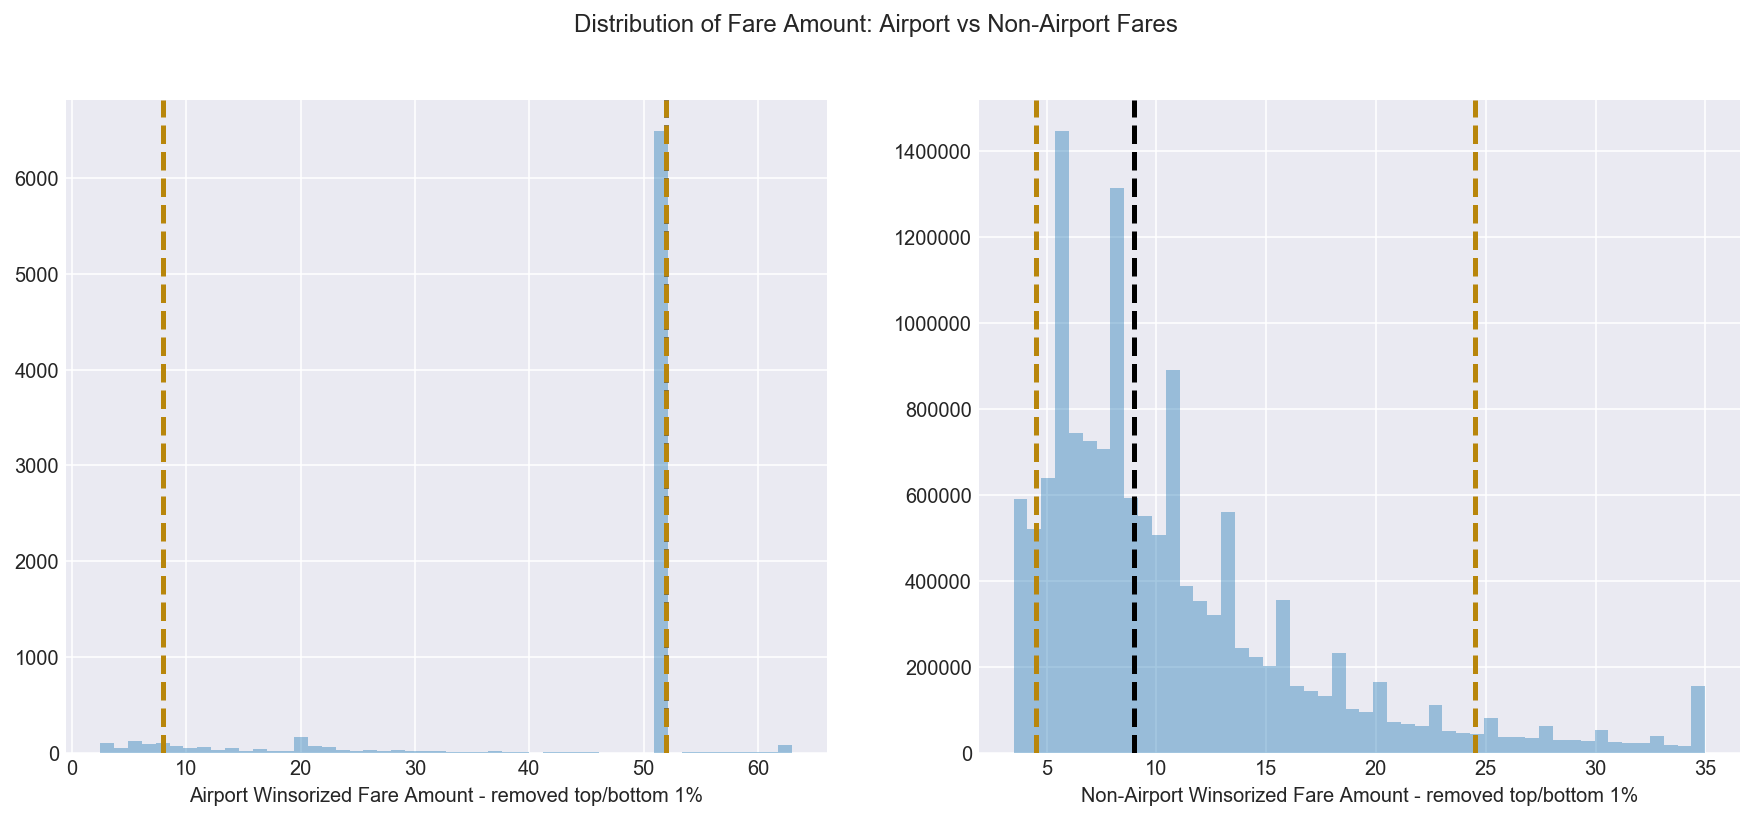

In [47]:
(fig, ax) = plt.subplots(1,2, figsize=(15,6))
ax[0] = sns.distplot(winsorized_airport_fare_amt, ax=ax[0], kde=False)
# Remove top and bottom 1% of fare amounts
ax[0].axvline(airport_fare_amt_median, lw=2.5, ls='dashed', color='black')
ax[0].axvline(airport_fare_amt_lower, lw=2.5, color='darkgoldenrod', ls='dashed')
ax[0].axvline(airport_fare_amt_upper, lw=2.5, color='darkgoldenrod', ls='dashed')
ax[1] = sns.distplot(winsorized_nonairport_fare_amt, ax=ax[1], kde=False)
ax[1].axvline(nonairport_fare_amt_median, lw=2.5, ls='dashed', color='black')
ax[1].axvline(nonairport_fare_amt_lower, lw=2.5, color='darkgoldenrod', ls='dashed')
ax[1].axvline(nonairport_fare_amt_upper, lw=2.5, color='darkgoldenrod', ls='dashed')
ax[0].set_xlabel('Airport Winsorized Fare Amount - removed top/bottom 1%')
ax[1].set_xlabel('Non-Airport Winsorized Fare Amount - removed top/bottom 1%')
fig.suptitle('Distribution of Fare Amount: Airport vs Non-Airport Fares')
None

In [48]:
# What is the mode?
airport_fare.fare_amount.mode()

0    52.0
dtype: float64

In [112]:
airport_fare.fare_amount.median()

52.0

In [49]:
most_common_airport_fare = airport_fare.copy()
most_common_airport_fare = most_common_airport_fare[most_common_airport_fare.fare_amount == 52.0]
most_common_airport_fare.head()

,index,medallion,hack_license,vendor_id,rate_code,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,speed
97,98,81C4DF9BA06C93EDCC87F6702E0B22F5,51FA34275A96BB8C216F2CBA8A18D0C9,CMT,2,2013-04-01 00:00:13,2013-04-01 00:07:25,1,431,1.70,-73.988914,40.718857,-74.007393,40.733482,CSH,52.0,0.0,0.5,0.0,0.00,52.50,14.199536
3072,3087,D147E34985C6C53EB978954C12667FDA,EE3B97473E38E69D0216927005CE3172,CMT,2,2013-04-01 00:18:10,2013-04-01 00:27:22,1,552,2.10,-73.987267,40.744686,-73.992851,40.721375,CSH,52.0,0.0,0.5,0.0,0.00,52.50,13.695652
3309,3325,5DFA10705410FA86ECFC6447038BF228,24D86F1D5547AE45D4E5FD79D8949064,VTS,2,2013-04-01 00:20:00,2013-04-01 00:32:00,2,720,8.75,-73.857826,40.736092,-73.997910,40.718147,CSH,52.0,0.0,0.5,0.0,0.00,52.50,43.750000
3551,3568,D932DC772B89F69D30F03FB095424F97,F5AE2E36090433DFE4142AFC19AFD495,CMT,2,2013-04-01 00:21:43,2013-04-01 00:35:24,1,820,12.20,-73.905167,40.768223,-73.958923,40.763676,CRD,52.0,0.0,0.5,3.0,5.33,60.83,53.560976
4233,4251,91E435E93E0C66BCEC7CE9164900CFF8,ABE08BCFEBF3F5F7339CA2170EEC1DEE,CMT,2,2013-04-01 00:26:47,2013-04-01 00:27:30,2,43,0.20,-73.975266,40.745609,-73.978210,40.741783,CRD,52.0,0.0,0.5,10.0,5.33,67.83,16.744186


In [50]:
# How did most passengers choose to pay this?
most_common_airport_fare.payment_type.value_counts(normalize=True)

CRD    0.563146
CSH    0.436854
Name: payment_type, dtype: float64

## 4. What is the distribution of the tip amount?
---
## 4.1 All Tips

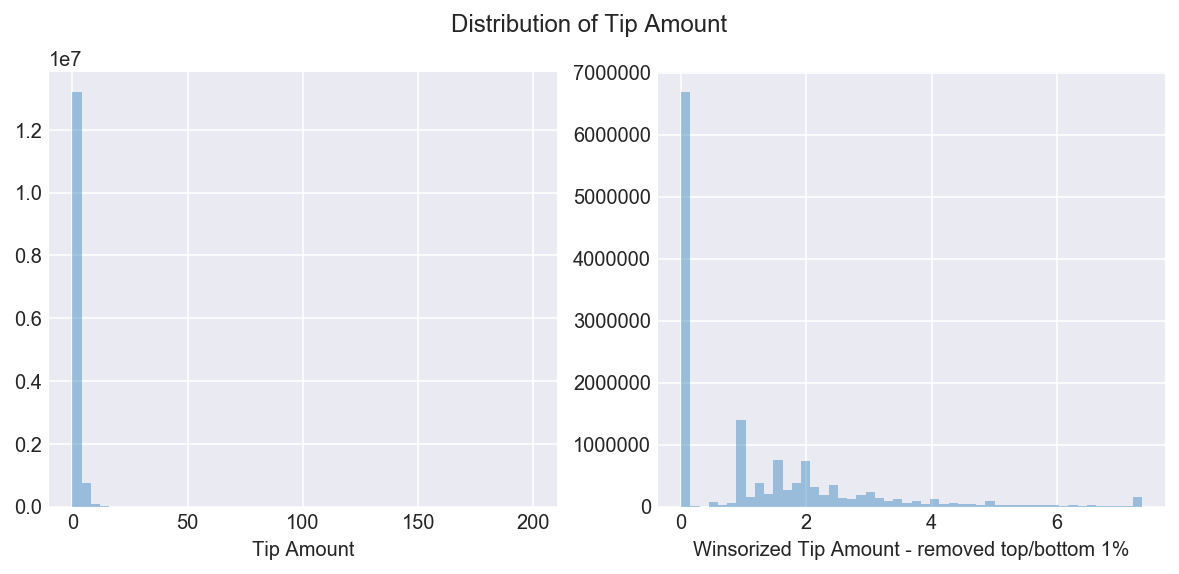

In [51]:
(fig, ax) = plt.subplots(1,2, figsize=(10,4))
ax[0] = sns.distplot(taxi_df2.tip_amount, ax=ax[0], kde=False)
# Remove top and bottom 1% of fare amounts
ax[1] = sns.distplot(winsorize(taxi_df2.tip_amount, limits=[0.01, 0.01]), ax=ax[1], kde=False)
ax[0].set_xlabel('Tip Amount')
ax[1].set_xlabel('Winsorized Tip Amount - removed top/bottom 1%')
fig.suptitle('Distribution of Tip Amount')
None

In [52]:
winsorized_tip_amt = winsorize(taxi_df2.tip_amount, limits=[0.01, 0.01])
tip_amt_median = np.median(winsorized_tip_amt)

tip_amt_lower = stats.scoreatpercentile(winsorized_tip_amt, 5)
tip_amt_upper = stats.scoreatpercentile(winsorized_tip_amt, 95)

print tip_amt_lower, tip_amt_median, tip_amt_upper

0.0 1.0 4.2


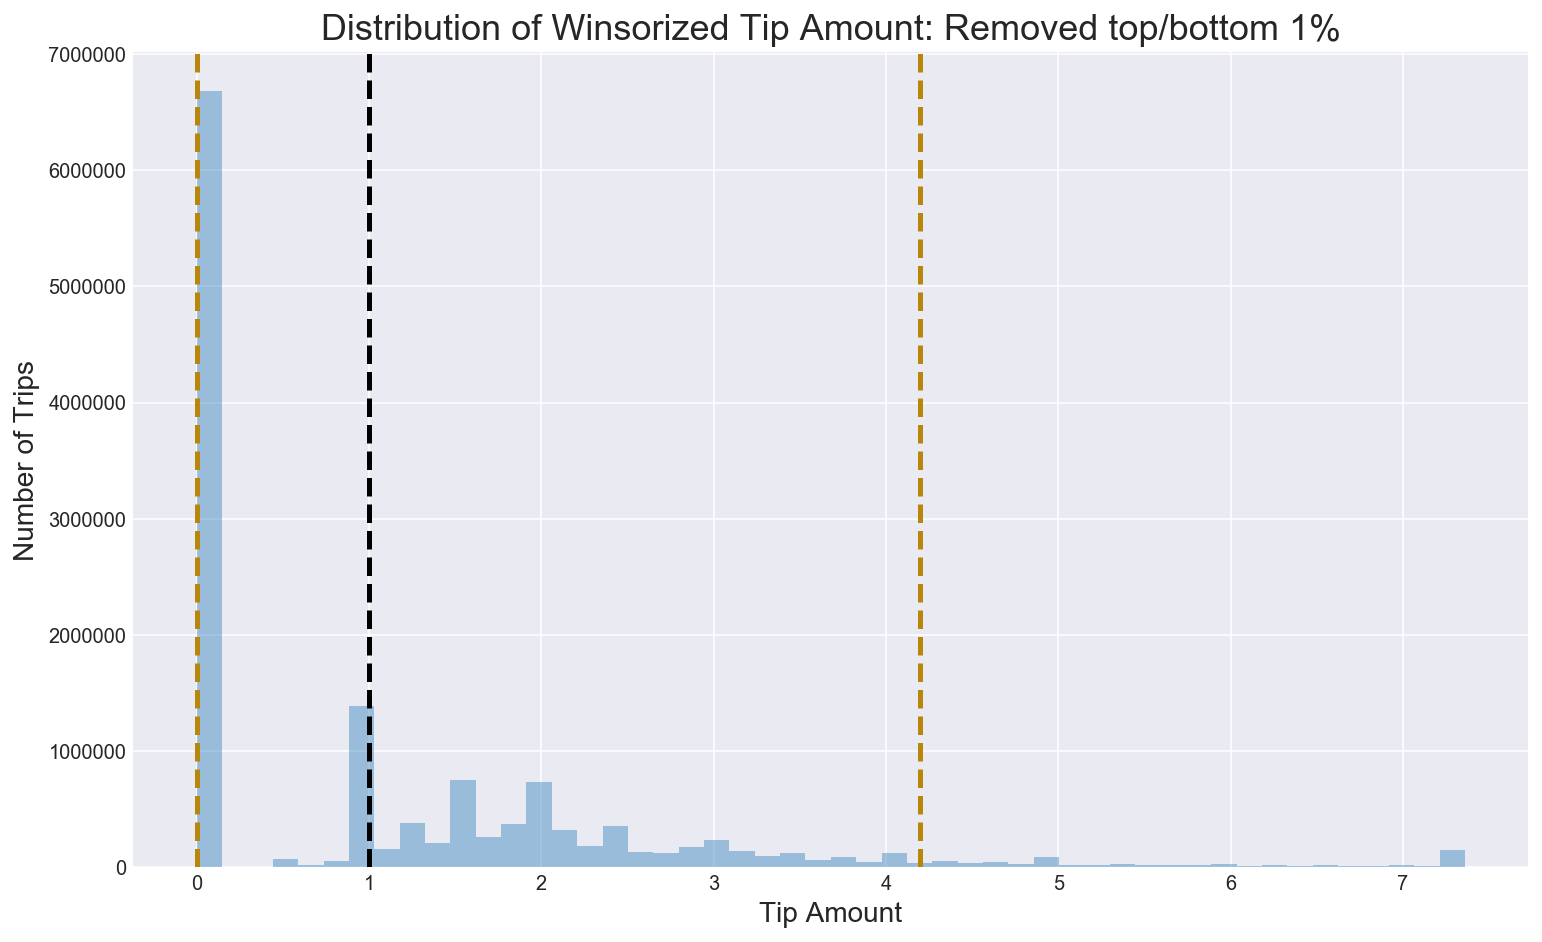

In [53]:
(fig, ax) = plt.subplots(figsize=(12.5,7.5))
ax = sns.distplot(winsorized_tip_amt, kde=False)
ax.axvline(tip_amt_median, lw=2.5, ls='dashed', color='black')
ax.axvline(tip_amt_lower, lw=2.5, color='darkgoldenrod', ls='dashed')
ax.axvline(tip_amt_upper, lw=2.5, color='darkgoldenrod', ls='dashed')
ax.set_title('Distribution of Winsorized Tip Amount: Removed top/bottom 1%', fontsize=18)
ax.set_xlabel('Tip Amount', fontsize=14)
ax.set_ylabel('Number of Trips', fontsize=14)
None

## 4.2 Airport Tips
---

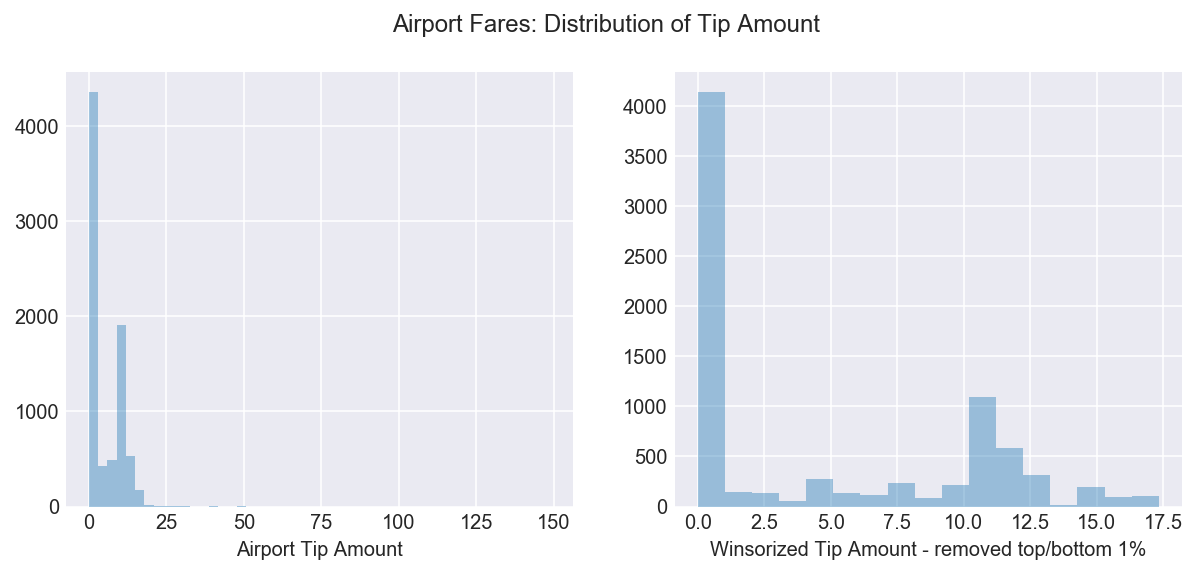

In [54]:
(fig, ax) = plt.subplots(1,2, figsize=(10,4))
ax[0] = sns.distplot(airport_fare.tip_amount, ax=ax[0], kde=False)
# Remove top and bottom 1% of fare amounts
ax[1] = sns.distplot(winsorize(airport_fare.tip_amount, limits=[0.01, 0.01]), ax=ax[1], kde=False)
ax[0].set_xlabel('Airport Tip Amount')
ax[1].set_xlabel('Winsorized Tip Amount - removed top/bottom 1%')
fig.suptitle('Airport Fares: Distribution of Tip Amount')
None

In [55]:
airport_winsorized_tip_amt = winsorize(airport_fare.tip_amount, limits=[0.01, 0.01])
airport_tip_amt_median = np.median(airport_winsorized_tip_amt)

airport_tip_amt_lower = stats.scoreatpercentile(airport_winsorized_tip_amt, 5)
airport_tip_amt_upper = stats.scoreatpercentile(airport_winsorized_tip_amt, 95)

print airport_tip_amt_lower, airport_tip_amt_median, airport_tip_amt_upper

0.0 0.0 14.144


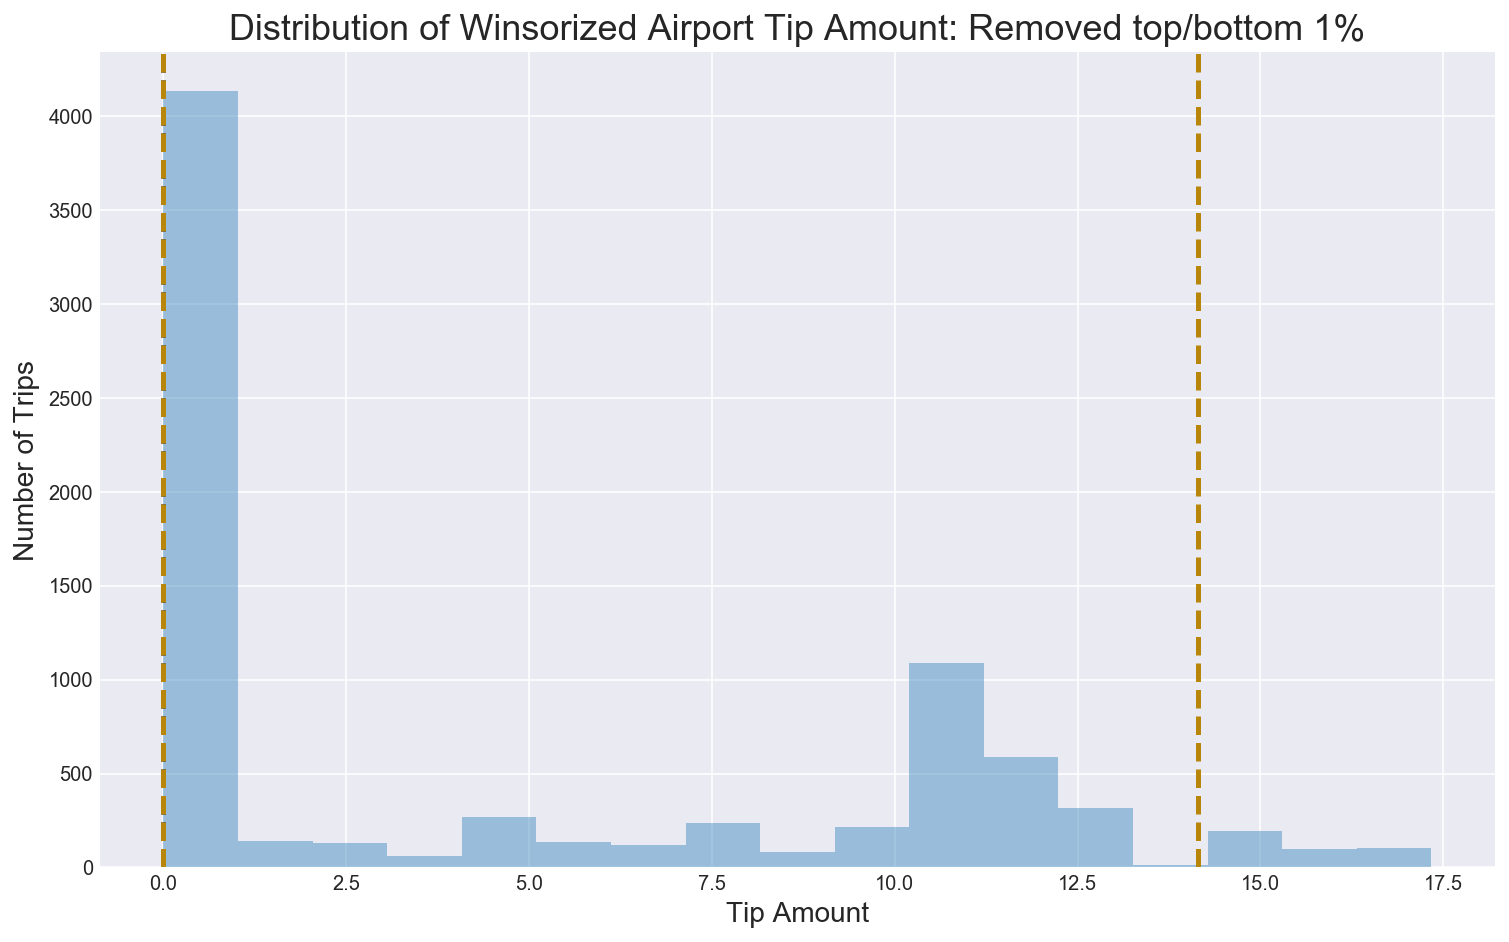

In [56]:
(fig, ax) = plt.subplots(figsize=(12.5,7.5))
ax = sns.distplot(airport_winsorized_tip_amt, kde=False)
ax.axvline(airport_tip_amt_median, lw=2.5, ls='dashed', color='black')
ax.axvline(airport_tip_amt_lower, lw=2.5, color='darkgoldenrod', ls='dashed')
ax.axvline(airport_tip_amt_upper, lw=2.5, color='darkgoldenrod', ls='dashed')
ax.set_title('Distribution of Winsorized Airport Tip Amount: Removed top/bottom 1%', fontsize=18)
ax.set_xlabel('Tip Amount', fontsize=14)
ax.set_ylabel('Number of Trips', fontsize=14)
None

## 4.3 Non-Airport Trips
---

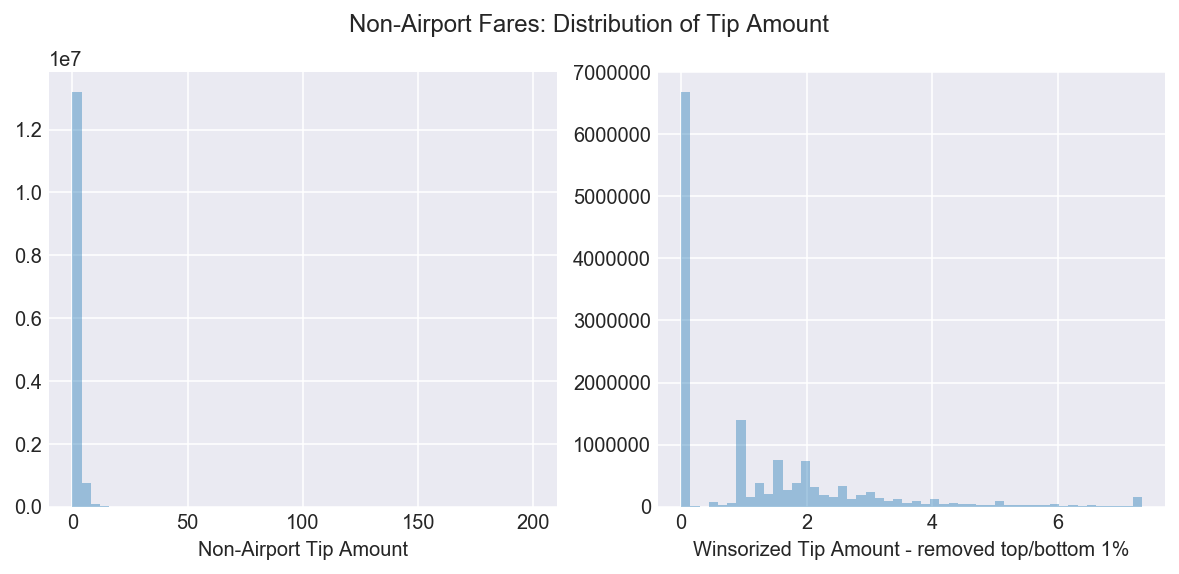

In [57]:
(fig, ax) = plt.subplots(1,2, figsize=(10,4))
ax[0] = sns.distplot(nonairport_fare.tip_amount, ax=ax[0], kde=False)
# Remove top and bottom 1% of fare amounts
ax[1] = sns.distplot(winsorize(nonairport_fare.tip_amount, limits=[0.01, 0.01]), ax=ax[1], kde=False)
ax[0].set_xlabel('Non-Airport Tip Amount')
ax[1].set_xlabel('Winsorized Tip Amount - removed top/bottom 1%')
fig.suptitle('Non-Airport Fares: Distribution of Tip Amount')
None

In [58]:
nonairport_winsorized_tip_amt = winsorize(nonairport_fare.tip_amount, limits=[0.01, 0.01])
nonairport_tip_amt_median = np.median(nonairport_winsorized_tip_amt)

nonairport_tip_amt_lower = stats.scoreatpercentile(nonairport_winsorized_tip_amt, 5)
nonairport_tip_amt_upper = stats.scoreatpercentile(nonairport_winsorized_tip_amt, 95)

print nonairport_tip_amt_lower, nonairport_tip_amt_median, nonairport_tip_amt_upper

0.0 1.0 4.2


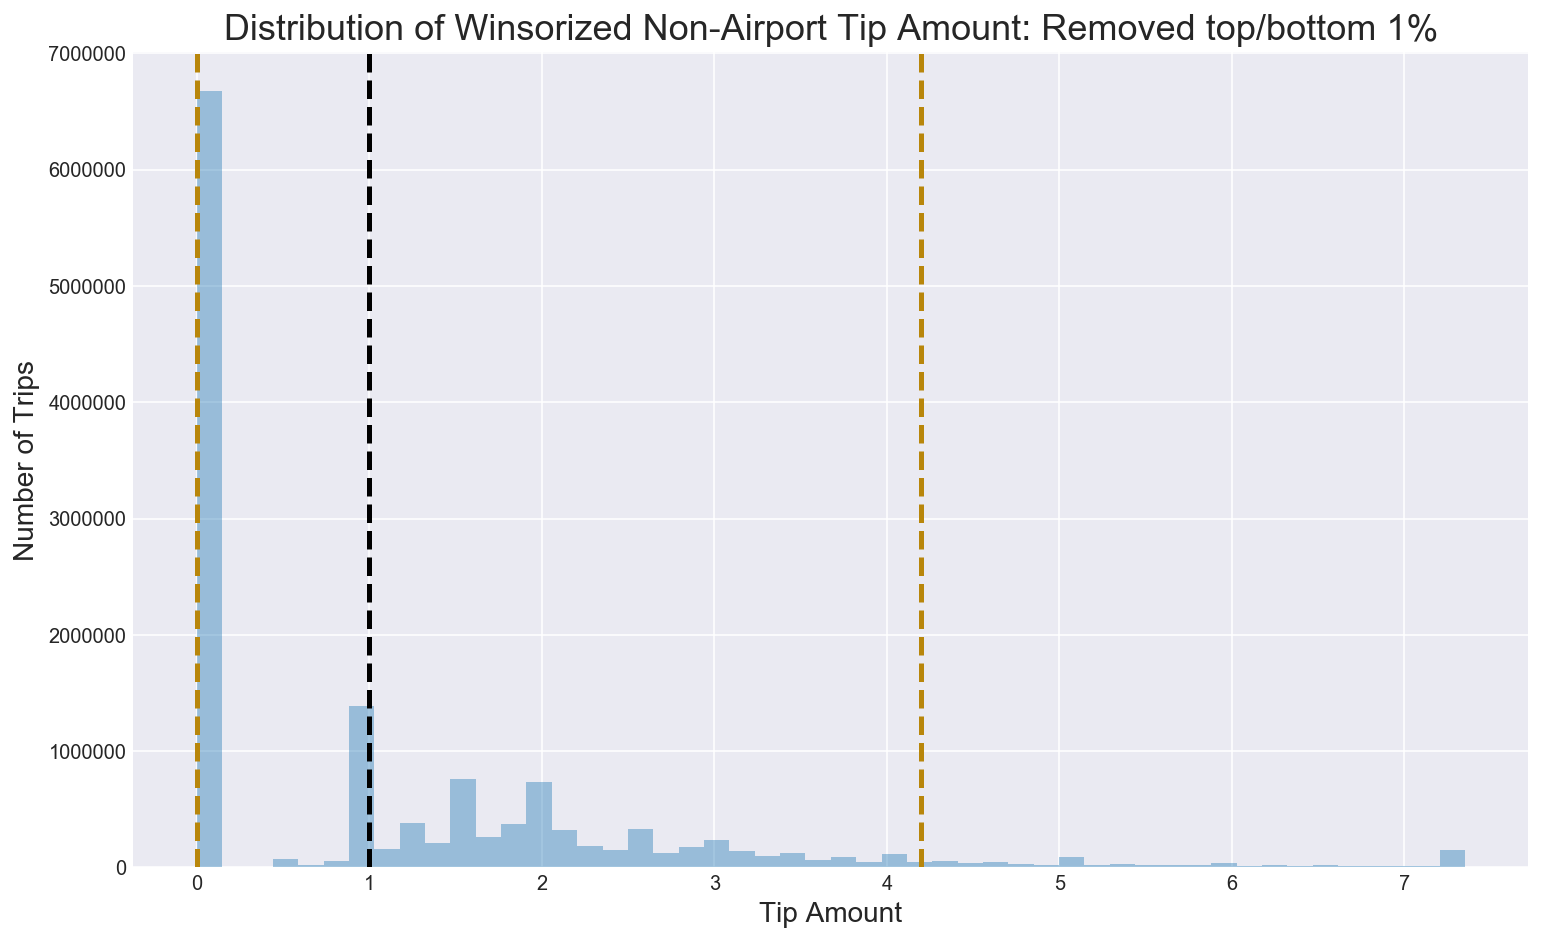

In [59]:
(fig, ax) = plt.subplots(figsize=(12.5,7.5))
ax = sns.distplot(nonairport_winsorized_tip_amt, kde=False)
ax.axvline(nonairport_tip_amt_median, lw=2.5, ls='dashed', color='black')
ax.axvline(nonairport_tip_amt_lower, lw=2.5, color='darkgoldenrod', ls='dashed')
ax.axvline(nonairport_tip_amt_upper, lw=2.5, color='darkgoldenrod', ls='dashed')
ax.set_title('Distribution of Winsorized Non-Airport Tip Amount: Removed top/bottom 1%', fontsize=18)
ax.set_xlabel('Tip Amount', fontsize=14)
ax.set_ylabel('Number of Trips', fontsize=14)
None

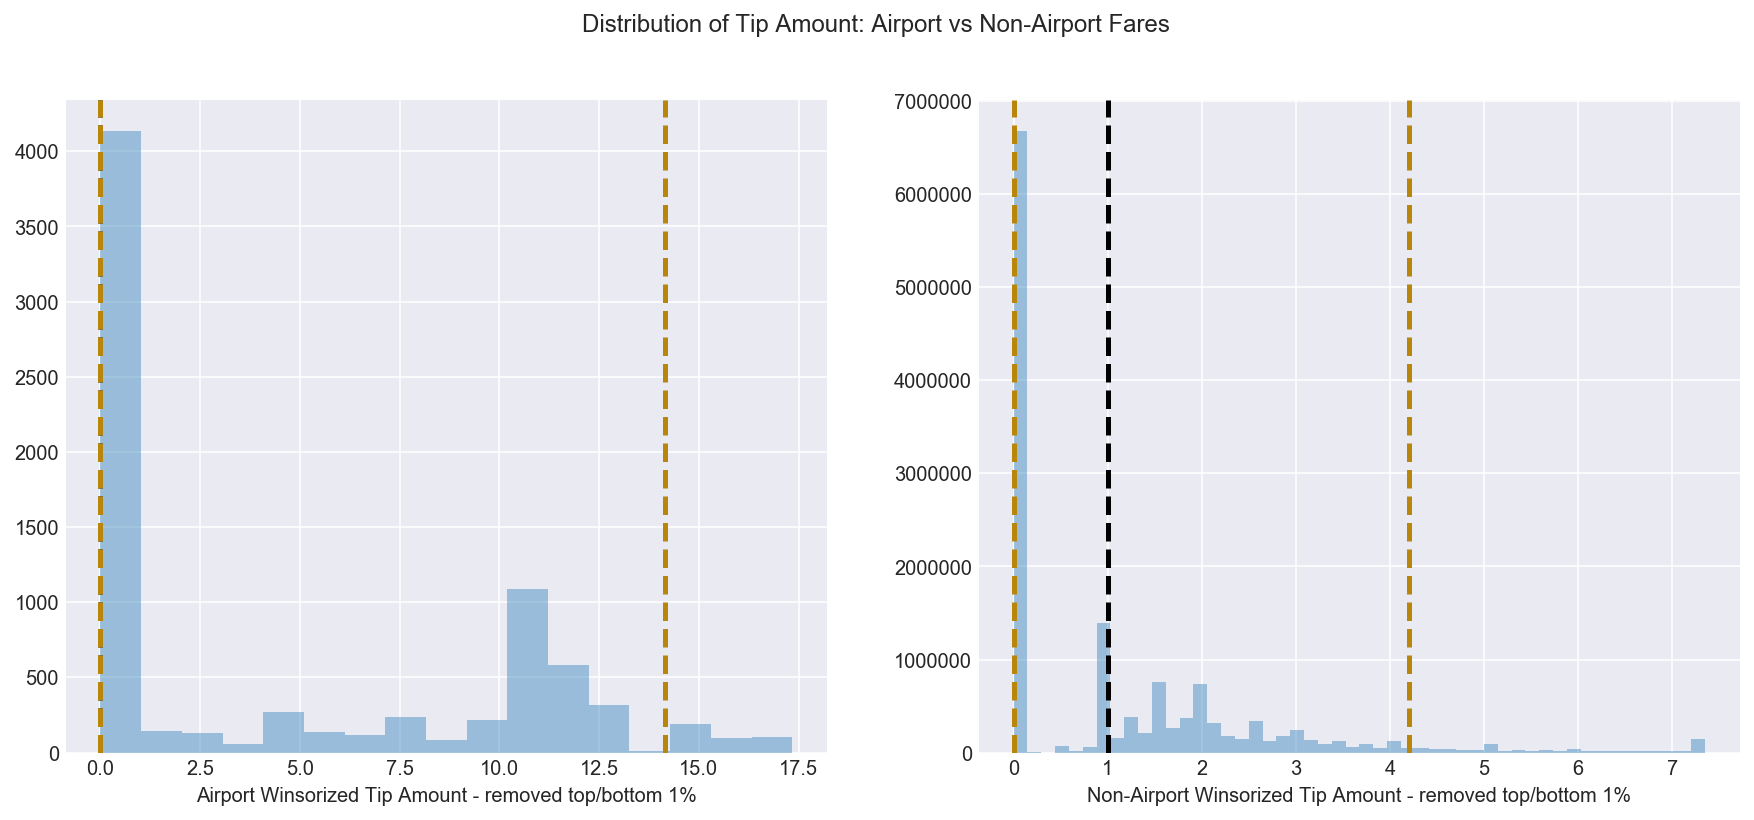

In [60]:
(fig, ax) = plt.subplots(1,2, figsize=(15,6))
ax[0] = sns.distplot(airport_winsorized_tip_amt, ax=ax[0], kde=False)
# Remove top and bottom 1% of fare amounts
ax[0].axvline(airport_tip_amt_median, lw=2.5, ls='dashed', color='black')
ax[0].axvline(airport_tip_amt_lower, lw=2.5, color='darkgoldenrod', ls='dashed')
ax[0].axvline(airport_tip_amt_upper, lw=2.5, color='darkgoldenrod', ls='dashed')
ax[1] = sns.distplot(nonairport_winsorized_tip_amt, ax=ax[1], kde=False)
ax[1].axvline(nonairport_tip_amt_median, lw=2.5, ls='dashed', color='black')
ax[1].axvline(nonairport_tip_amt_lower, lw=2.5, color='darkgoldenrod', ls='dashed')
ax[1].axvline(nonairport_tip_amt_upper, lw=2.5, color='darkgoldenrod', ls='dashed')
ax[0].set_xlabel('Airport Winsorized Tip Amount - removed top/bottom 1%')
ax[1].set_xlabel('Non-Airport Winsorized Tip Amount - removed top/bottom 1%')
fig.suptitle('Distribution of Tip Amount: Airport vs Non-Airport Fares')
None

## 5. What is the distribution of the Total Amount?
---
## 5.1 All Fares

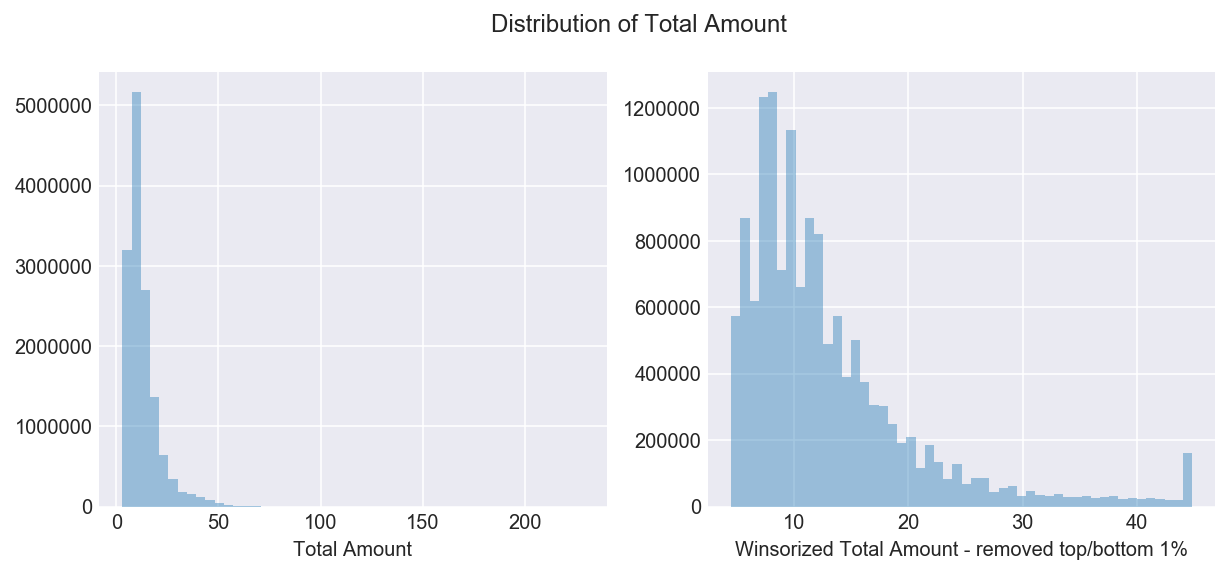

In [61]:
(fig, ax) = plt.subplots(1,2, figsize=(10,4))
ax[0] = sns.distplot(taxi_df2.total_amount, kde=False, ax=ax[0])
# Remove top and bottom 1% of fare amounts
ax[1] = sns.distplot(winsorize(taxi_df2.total_amount, limits=[0.01, 0.01]), kde=False, ax=ax[1])
ax[0].set_xlabel('Total Amount')
ax[1].set_xlabel('Winsorized Total Amount - removed top/bottom 1%')
fig.suptitle('Distribution of Total Amount')
None

In [62]:
winsorized_tot_amt = winsorize(taxi_df2.total_amount, limits=[0.01, 0.01])
tot_amt_median = np.median(winsorized_tot_amt)

tot_amt_lower = stats.scoreatpercentile(winsorized_tot_amt, 5)
tot_amt_upper = stats.scoreatpercentile(winsorized_tot_amt, 95)

print tot_amt_lower, tot_amt_median, tot_amt_upper

5.5 10.8 29.25


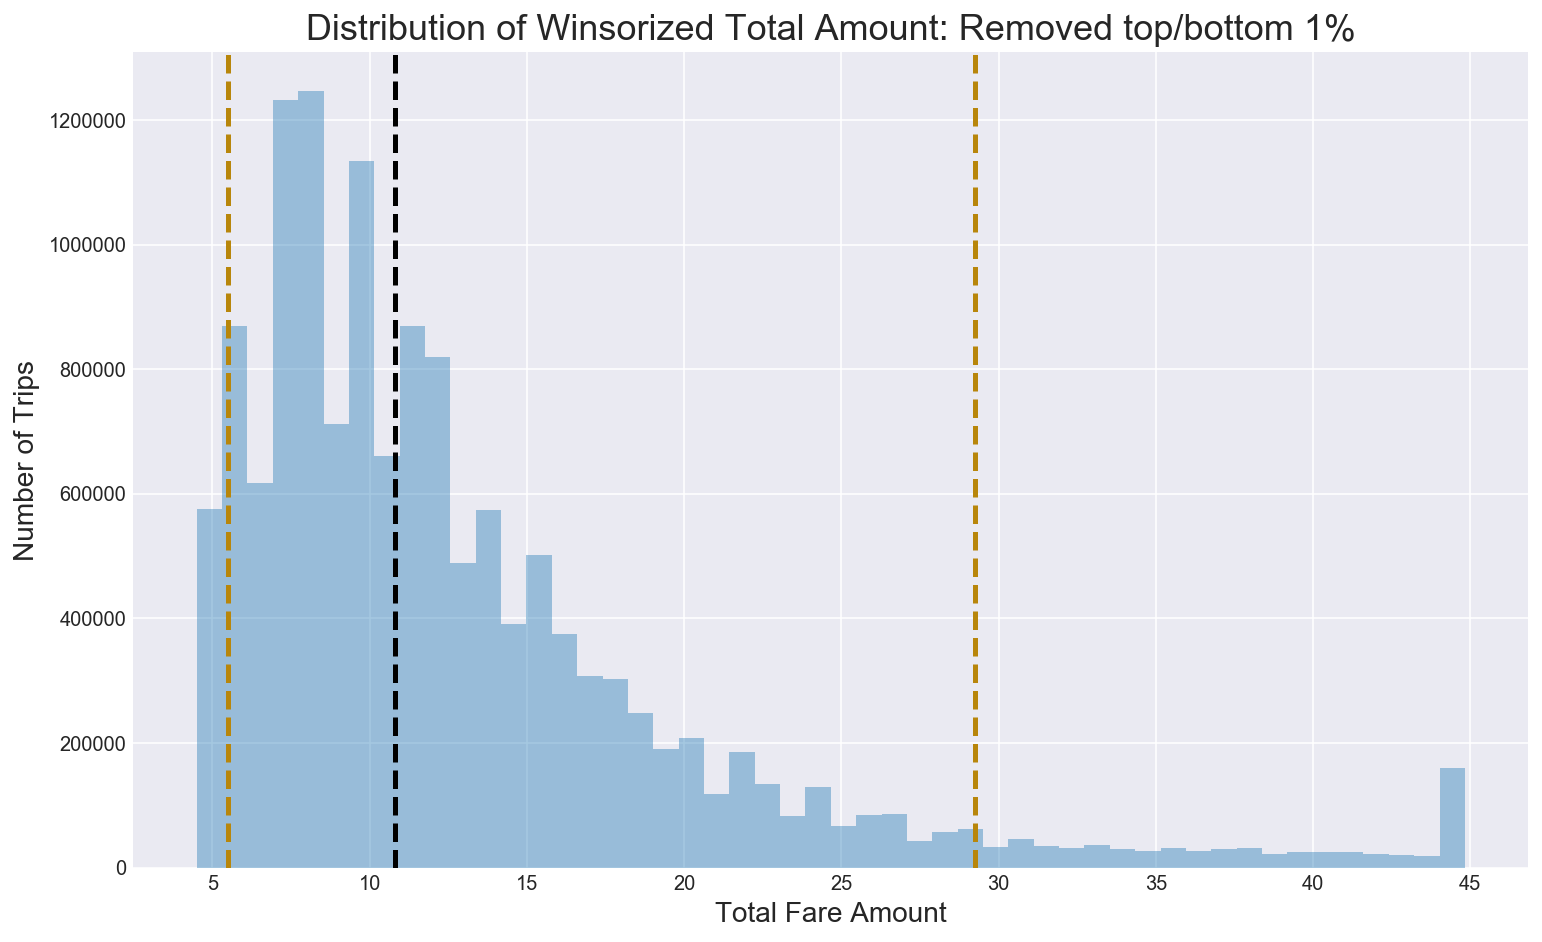

In [63]:
(fig, ax) = plt.subplots(figsize=(12.5,7.5))
ax = sns.distplot(winsorized_tot_amt, kde=False)
ax.axvline(tot_amt_median, lw=2.5, ls='dashed', color='black')
ax.axvline(tot_amt_lower, lw=2.5, color='darkgoldenrod', ls='dashed')
ax.axvline(tot_amt_upper, lw=2.5, color='darkgoldenrod', ls='dashed')
ax.set_title('Distribution of Winsorized Total Amount: Removed top/bottom 1%', fontsize=18)
ax.set_xlabel('Total Fare Amount', fontsize=14)
ax.set_ylabel('Number of Trips', fontsize=14)
None

## 5.2 Airport Total Amount
---

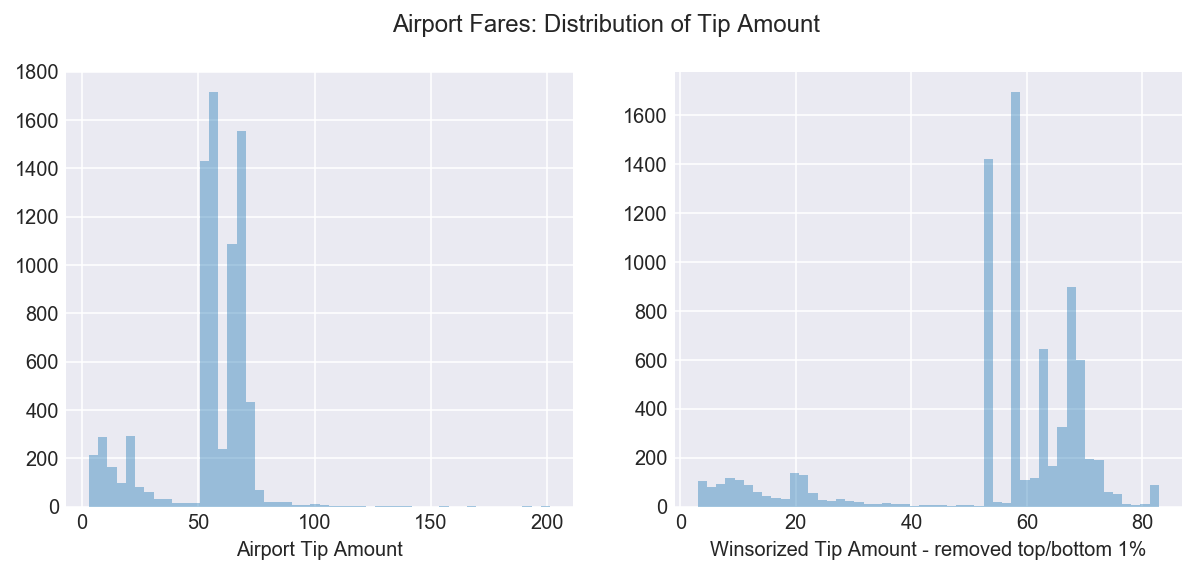

In [64]:
(fig, ax) = plt.subplots(1,2, figsize=(10,4))
ax[0] = sns.distplot(airport_fare.total_amount, ax=ax[0], kde=False)
# Remove top and bottom 1% of fare amounts
ax[1] = sns.distplot(winsorize(airport_fare.total_amount, limits=[0.01, 0.01]), ax=ax[1], kde=False)
ax[0].set_xlabel('Airport Tip Amount')
ax[1].set_xlabel('Winsorized Tip Amount - removed top/bottom 1%')
fig.suptitle('Airport Fares: Distribution of Tip Amount')
None

In [65]:
airport_winsorized_tot_amt = winsorize(airport_fare.total_amount, limits=[0.01, 0.01])
airport_tot_amt_median = np.median(airport_winsorized_tot_amt)

airport_tot_amt_lower = stats.scoreatpercentile(airport_winsorized_tot_amt, 5)
airport_tot_amt_upper = stats.scoreatpercentile(airport_winsorized_tot_amt, 95)

print airport_tot_amt_lower, airport_tot_amt_median, airport_tot_amt_upper

9.5 57.83 72.28


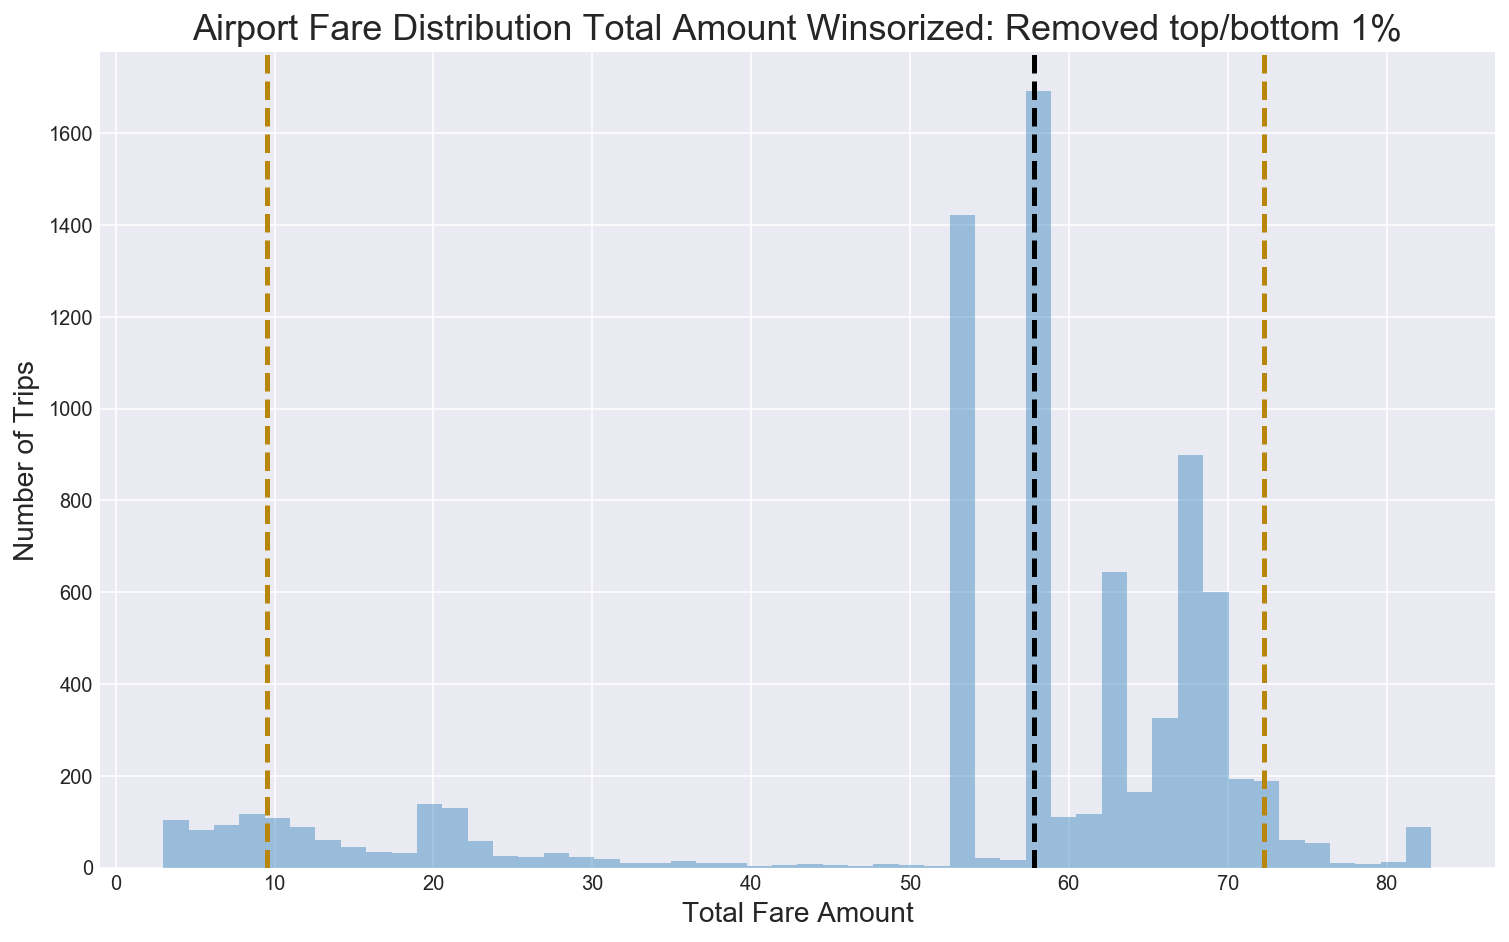

In [66]:
(fig, ax) = plt.subplots(figsize=(12.5,7.5))
ax = sns.distplot(airport_winsorized_tot_amt, kde=False)
ax.axvline(airport_tot_amt_median, lw=2.5, ls='dashed', color='black')
ax.axvline(airport_tot_amt_lower, lw=2.5, color='darkgoldenrod', ls='dashed')
ax.axvline(airport_tot_amt_upper, lw=2.5, color='darkgoldenrod', ls='dashed')
ax.set_title('Airport Fare Distribution Total Amount Winsorized: Removed top/bottom 1%', fontsize=18)
ax.set_xlabel('Total Fare Amount', fontsize=14)
ax.set_ylabel('Number of Trips', fontsize=14)
None

In [114]:
airport_fare.total_amount.mode()

0    57.83
dtype: float64

## 5.3 Non-Airport Total Amount
---

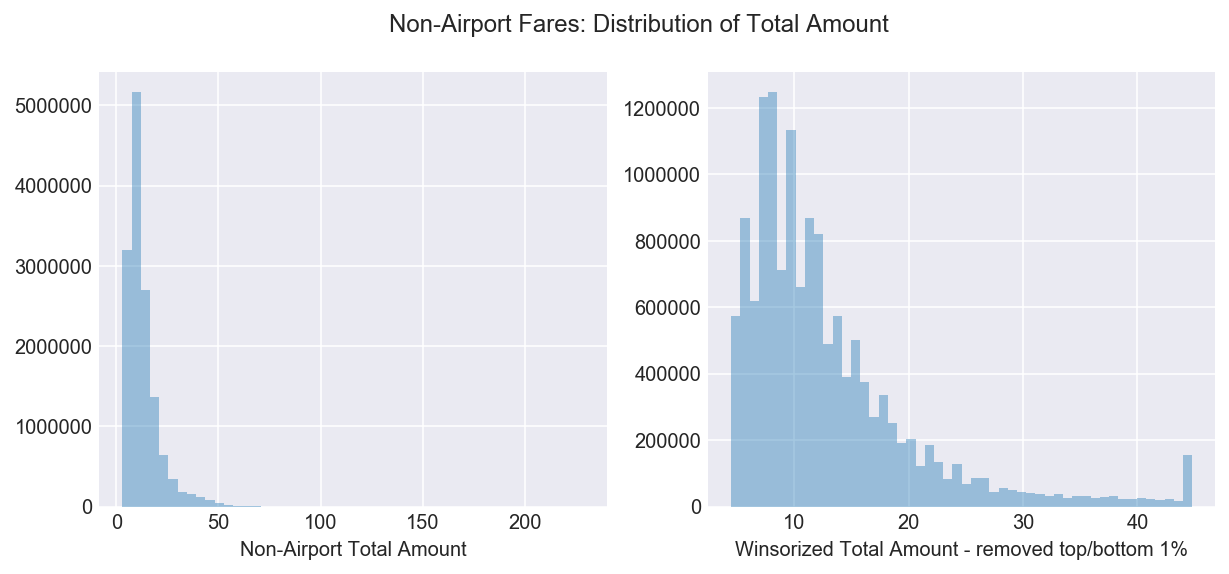

In [67]:
(fig, ax) = plt.subplots(1,2, figsize=(10,4))
ax[0] = sns.distplot(nonairport_fare.total_amount, ax=ax[0], kde=False)
# Remove top and bottom 1% of fare amounts
ax[1] = sns.distplot(winsorize(nonairport_fare.total_amount, limits=[0.01, 0.01]), ax=ax[1], kde=False)
ax[0].set_xlabel('Non-Airport Total Amount')
ax[1].set_xlabel('Winsorized Total Amount - removed top/bottom 1%')
fig.suptitle('Non-Airport Fares: Distribution of Total Amount')
None

In [68]:
nonairport_winsorized_tot_amt = winsorize(nonairport_fare.total_amount, limits=[0.01, 0.01])
nonairport_tot_amt_median = np.median(nonairport_winsorized_tot_amt)

nonairport_tot_amt_lower = stats.scoreatpercentile(nonairport_winsorized_tot_amt, 5)
nonairport_tot_amt_upper = stats.scoreatpercentile(nonairport_winsorized_tot_amt, 95)

print nonairport_tot_amt_lower, nonairport_tot_amt_median, nonairport_tot_amt_upper

5.5 10.8 29.0


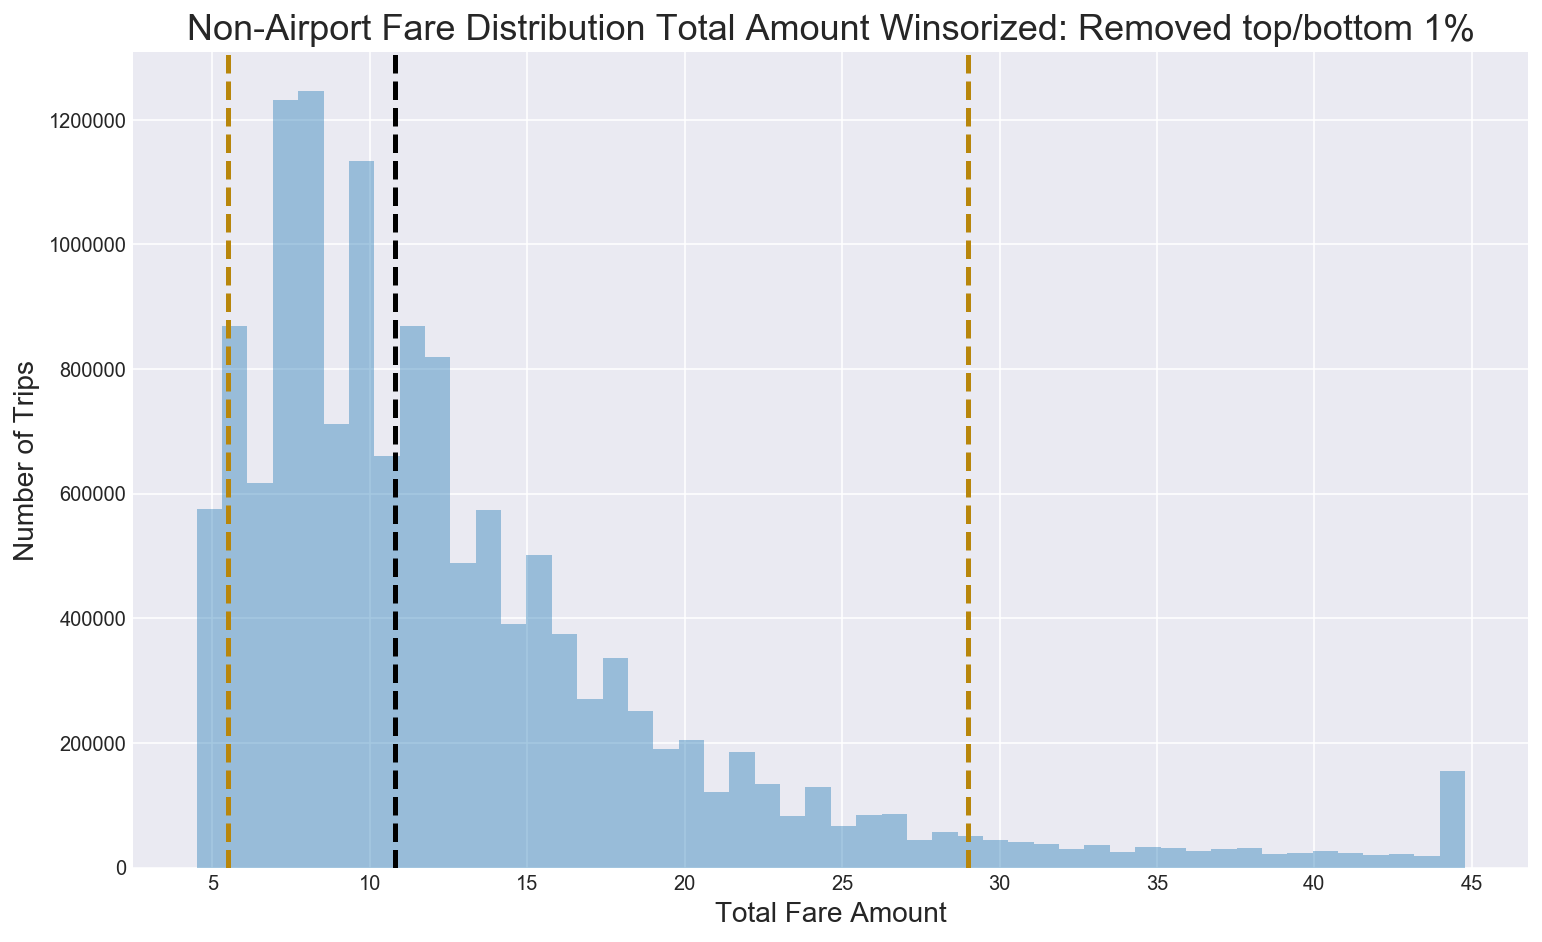

In [69]:
(fig, ax) = plt.subplots(figsize=(12.5,7.5))
ax = sns.distplot(nonairport_winsorized_tot_amt, kde=False)
ax.axvline(nonairport_tot_amt_median, lw=2.5, ls='dashed', color='black')
ax.axvline(nonairport_tot_amt_lower, lw=2.5, color='darkgoldenrod', ls='dashed')
ax.axvline(nonairport_tot_amt_upper, lw=2.5, color='darkgoldenrod', ls='dashed')
ax.set_title('Non-Airport Fare Distribution Total Amount Winsorized: Removed top/bottom 1%', fontsize=18)
ax.set_xlabel('Total Fare Amount', fontsize=14)
ax.set_ylabel('Number of Trips', fontsize=14)
None

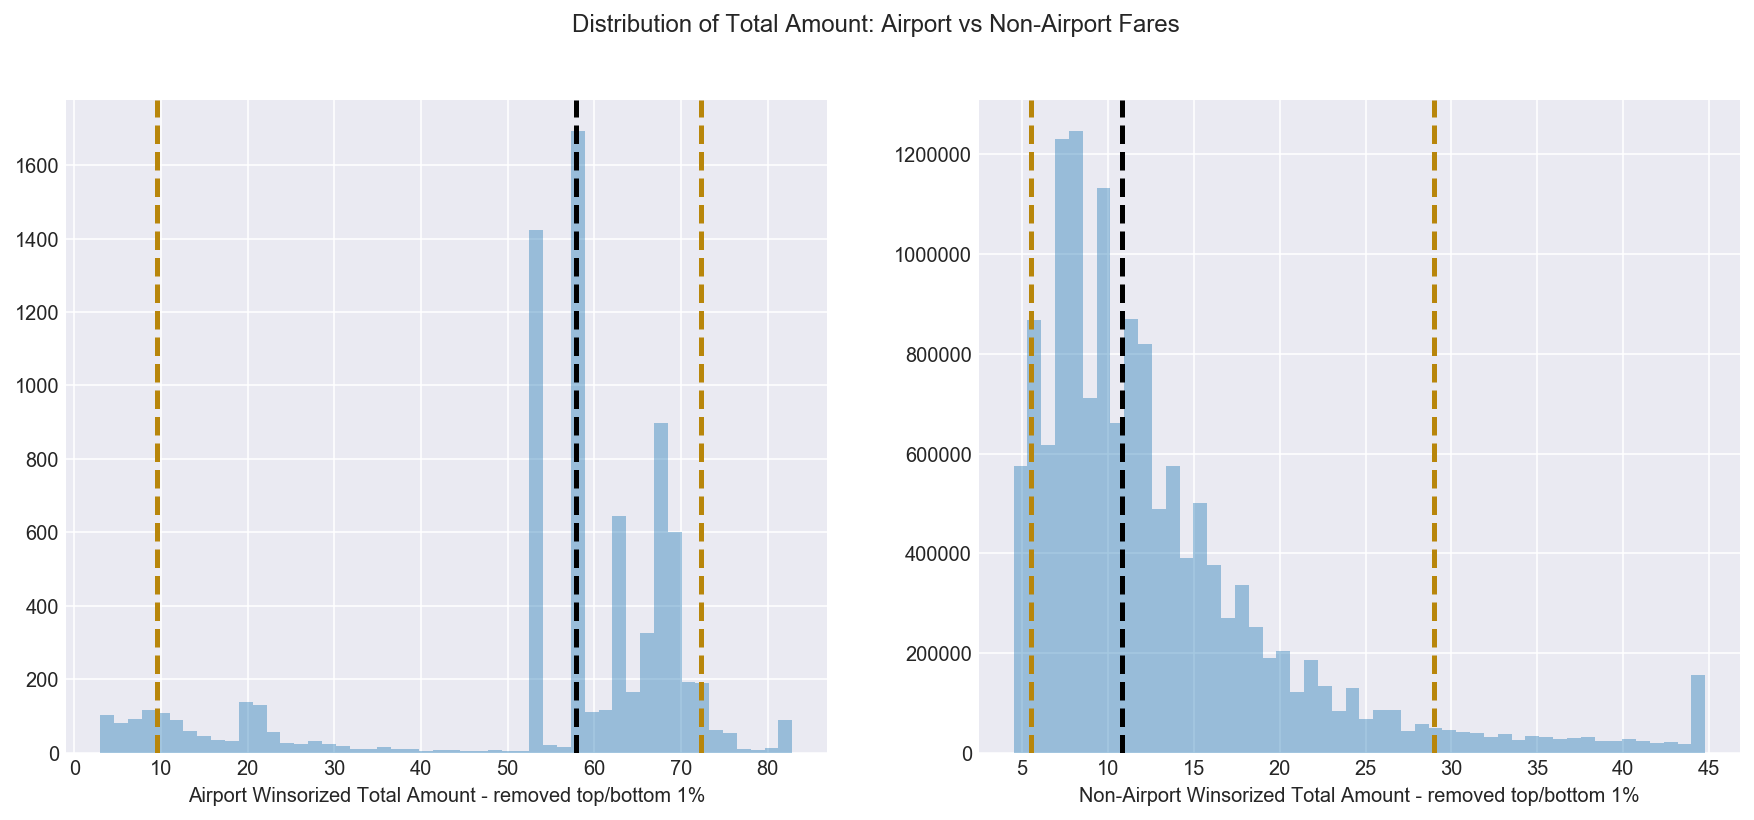

In [70]:
(fig, ax) = plt.subplots(1,2, figsize=(15,6))
ax[0] = sns.distplot(airport_winsorized_tot_amt, ax=ax[0], kde=False)
# Remove top and bottom 1% of fare amounts
ax[0].axvline(airport_tot_amt_median, lw=2.5, ls='dashed', color='black')
ax[0].axvline(airport_tot_amt_lower, lw=2.5, color='darkgoldenrod', ls='dashed')
ax[0].axvline(airport_tot_amt_upper, lw=2.5, color='darkgoldenrod', ls='dashed')
ax[1] = sns.distplot(nonairport_winsorized_tot_amt, ax=ax[1], kde=False)
ax[1].axvline(nonairport_tot_amt_median, lw=2.5, ls='dashed', color='black')
ax[1].axvline(nonairport_tot_amt_lower, lw=2.5, color='darkgoldenrod', ls='dashed')
ax[1].axvline(nonairport_tot_amt_upper, lw=2.5, color='darkgoldenrod', ls='dashed')
ax[0].set_xlabel('Airport Winsorized Total Amount - removed top/bottom 1%')
ax[1].set_xlabel('Non-Airport Winsorized Total Amount - removed top/bottom 1%')
fig.suptitle('Distribution of Total Amount: Airport vs Non-Airport Fares')
None

## 6. What are the top 5 busiest hours of the day?

In [71]:
# Convert pickup_datetime and dropoff_datetime to datetime format
taxi_df2['pickup_datetime'] = pd.to_datetime(taxi_df2['pickup_datetime'])
taxi_df2['dropoff_datetime'] = pd.to_datetime(taxi_df2['dropoff_datetime'])
taxi_df2.head()

,index,medallion,hack_license,vendor_id,rate_code,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,speed
0,0,52BC28EAABDDC48741F825000D738850,DA77BDC1BC5CFD0E31613E7E2FF4EA24,CMT,1,2013-04-01,2013-04-01 00:10:32,1,632,3.40,-73.993500,40.746933,-73.956322,40.773064,CRD,12.0,0.5,0.5,2.6,0.0,15.6,19.367089
1,1,B8733215A7E6A22EB832EEAEA731D3CB,66707B80913E62642A6C2E0BFEE45955,VTS,1,2013-04-01,2013-04-01 00:35:00,1,2100,10.29,-73.917908,40.770863,-73.899574,40.754028,CSH,34.0,0.5,0.5,0.0,0.0,35.0,17.640000
2,2,D80FD255D1921207A256F30136F4DBB2,871954A11B0687C7C43B0E782AAEC9F1,VTS,1,2013-04-01,2013-04-01 00:04:00,4,240,0.97,-73.959290,40.719727,-73.966736,40.710716,CRD,5.0,0.5,0.5,1.1,0.0,7.1,14.550000
3,3,23966E68120CC7347D4CE2FA60C133CD,EA554CB787C4BE0D1F90E9C5B2009A4F,VTS,1,2013-04-01,2013-04-01 00:06:00,1,360,1.69,-73.990929,40.760746,-74.003082,40.741711,CRD,7.5,0.5,0.5,2.0,0.0,10.5,16.900000
4,4,67541D5955294F42CC3044A0950ECE2F,379099329932F1F8D72CB0F2DAC17525,VTS,1,2013-04-01,2013-04-01 00:05:00,1,300,1.82,-73.970650,40.758587,-73.979584,40.737556,CRD,7.0,0.5,0.5,1.5,0.0,9.5,21.840000


In [72]:
# Use pickup datetime to determine hour e.g. if someone was picked up at 23:15:16, they were picked up at 2300 hours
taxi_df2.groupby(taxi_df2.pickup_datetime.dt.hour)['passenger_count'].sum().sort_values(ascending=False)

pickup_datetime
19    1545408
18    1489120
20    1484270
21    1431273
22    1387915
23    1204093
14    1201952
12    1187628
17    1182647
15    1152979
13    1147418
9     1145355
11    1133410
8     1110772
10    1102852
16     955987
0      914805
7      883813
1      657701
2      493860
6      453399
3      355677
4      247646
5      192495
Name: passenger_count, dtype: int64

In [73]:
b = taxi_df2.groupby(taxi_df2.pickup_datetime.dt.hour)['passenger_count'].size().sort_values(ascending=False).head()
b = b.to_frame().reset_index()
b = b.rename(columns={'pickup_datetime': 'hour'})
b_df = b.copy()
b_df

,hour,passenger_count
0,19,897799
1,18,868202
2,20,858910
3,21,822142
4,22,790904


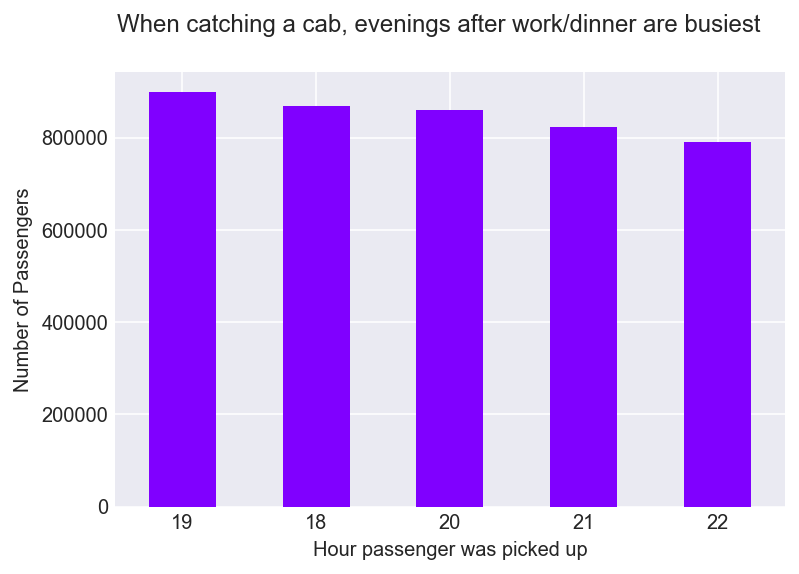

In [74]:
fig, ax = plt.subplots(figsize=(6,4))
ax = b_df.set_index('hour').plot(kind='bar', colormap='rainbow', legend=False, rot=0, ax=ax)
ax.set_xlabel('Hour passenger was picked up')
ax.set_ylabel('Number of Passengers')
fig.suptitle('When catching a cab, evenings after work/dinner are busiest')
plt.ticklabel_format(style='plain', axis='y')
None

In [75]:
taxi_df2['DayofWeek'] = taxi_df2.pickup_datetime.dt.weekday_name
taxi_df2['Hour'] = taxi_df2.pickup_datetime.dt.hour
taxi_df2.head()

,index,medallion,hack_license,vendor_id,rate_code,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,speed,DayofWeek,Hour
0,0,52BC28EAABDDC48741F825000D738850,DA77BDC1BC5CFD0E31613E7E2FF4EA24,CMT,1,2013-04-01,2013-04-01 00:10:32,1,632,3.40,-73.993500,40.746933,-73.956322,40.773064,CRD,12.0,0.5,0.5,2.6,0.0,15.6,19.367089,Monday,0
1,1,B8733215A7E6A22EB832EEAEA731D3CB,66707B80913E62642A6C2E0BFEE45955,VTS,1,2013-04-01,2013-04-01 00:35:00,1,2100,10.29,-73.917908,40.770863,-73.899574,40.754028,CSH,34.0,0.5,0.5,0.0,0.0,35.0,17.640000,Monday,0
2,2,D80FD255D1921207A256F30136F4DBB2,871954A11B0687C7C43B0E782AAEC9F1,VTS,1,2013-04-01,2013-04-01 00:04:00,4,240,0.97,-73.959290,40.719727,-73.966736,40.710716,CRD,5.0,0.5,0.5,1.1,0.0,7.1,14.550000,Monday,0
3,3,23966E68120CC7347D4CE2FA60C133CD,EA554CB787C4BE0D1F90E9C5B2009A4F,VTS,1,2013-04-01,2013-04-01 00:06:00,1,360,1.69,-73.990929,40.760746,-74.003082,40.741711,CRD,7.5,0.5,0.5,2.0,0.0,10.5,16.900000,Monday,0
4,4,67541D5955294F42CC3044A0950ECE2F,379099329932F1F8D72CB0F2DAC17525,VTS,1,2013-04-01,2013-04-01 00:05:00,1,300,1.82,-73.970650,40.758587,-73.979584,40.737556,CRD,7.0,0.5,0.5,1.5,0.0,9.5,21.840000,Monday,0


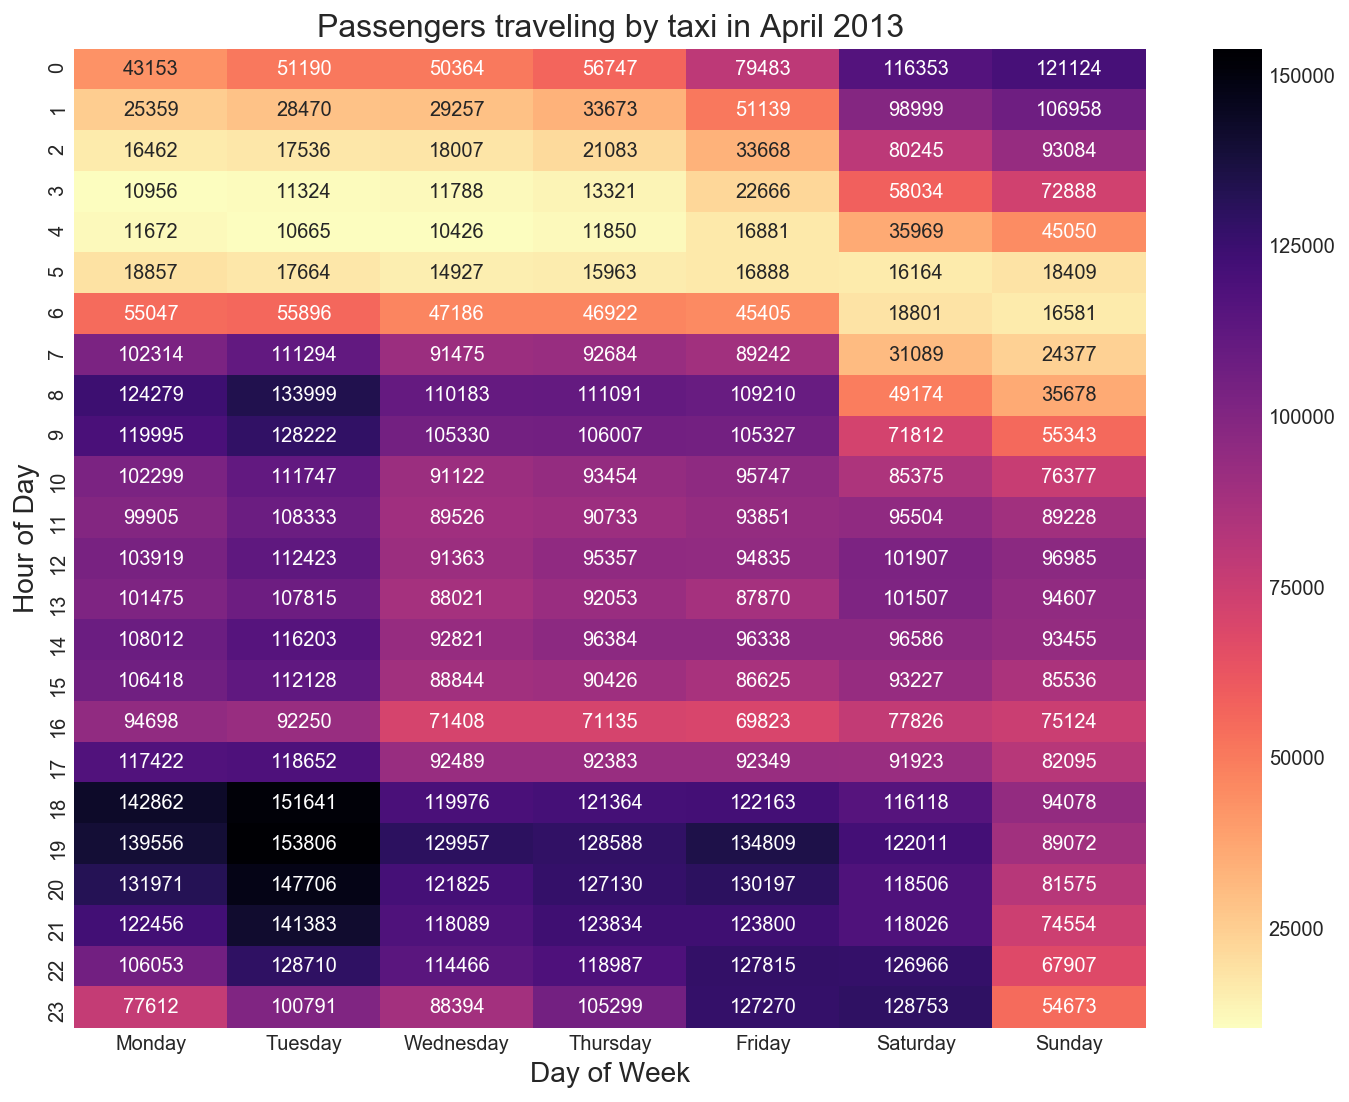

In [76]:
# What are the busiest days and hours for taxi drivers?
busiest_df = taxi_df2.groupby(['DayofWeek','Hour'])['passenger_count'].size().reset_index()
busiest_piv = pd.pivot_table(busiest_df, values="passenger_count",index=["Hour"], columns=["DayofWeek"], fill_value=0)
busiest_piv = busiest_piv[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]
#plot pivot table as heatmap using seaborn
fig, ax = plt.subplots(figsize=(12,9))
ax = sns.heatmap(busiest_piv, ax=ax, cmap='magma_r', annot=True, fmt="d")
ax.set_xlabel('Day of Week', fontsize=14)
ax.set_ylabel('Hour of Day', fontsize=14)
ax.set_title('Passengers traveling by taxi in April 2013', fontsize=16)
None

## 7. What are the top 10 busiest locations in the city?

In [77]:
# 2 d.p. of precision will suffice
taxi_df3 = taxi_df2.copy()
taxi_df3['pickup_latitude'] = taxi_df3.pickup_latitude.round(2)
taxi_df3['pickup_longitude'] = taxi_df3.pickup_longitude.round(2)
taxi_df3['dropoff_latitude'] = taxi_df3.dropoff_latitude.round(2)
taxi_df3['dropoff_longitude'] = taxi_df3.dropoff_longitude.round(2)
taxi_df3.tail()

,index,medallion,hack_license,vendor_id,rate_code,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,speed,DayofWeek,Hour
14064063,14100154,D10870DF96A6A201337FF2EF5B3D893D,287F30AEA8CF3242D100EC3CFF5BE2DA,CMT,1,2013-04-30 23:59:57,2013-05-01 00:03:37,1,219,1.0,-73.98,40.78,-73.99,40.77,CSH,5.5,0.5,0.5,0.00,0.0,6.50,16.438356,Tuesday,23
14064064,14100155,CB0CF7051AAD729BD1F030EC42E3AAFB,69D7B9A38A419958A40EC9F299642F17,CMT,1,2013-04-30 23:59:58,2013-05-01 00:16:44,1,1006,4.2,-73.98,40.76,-74.00,40.74,CRD,14.5,0.5,0.5,2.00,0.0,17.50,15.029821,Tuesday,23
14064065,14100156,1948C5FBB3E9E807D27074F528465F90,00C2CDB494E2163E6B83204FE5AAE516,CMT,1,2013-04-30 23:59:58,2013-05-01 00:02:52,2,173,0.6,-73.98,40.78,-73.98,40.77,CRD,4.0,0.5,0.5,1.00,0.0,6.00,12.485549,Tuesday,23
14064066,14100157,A8262FA0AFCB6C7229F6888EAFBDE076,5F9351CC273E38A49A6CD691FFF5B980,CMT,1,2013-04-30 23:59:58,2013-05-01 00:06:38,1,399,1.7,-73.94,40.78,-73.94,40.78,CRD,7.5,0.5,0.5,1.11,0.0,9.61,15.338346,Tuesday,23
14064067,14100158,CC75E7B29C4D32F9A45F6582F448C789,1BC47AA485CD2C61E65A2CA57C690918,CMT,1,2013-04-30 23:59:58,2013-05-01 00:07:16,1,438,1.7,-74.00,40.73,-73.99,40.75,CSH,7.5,0.5,0.5,0.00,0.0,8.50,13.972603,Tuesday,23


In [78]:
taxi_df3['pickup_geocode'] = taxi_df3.pickup_latitude.astype(str) + ', ' + taxi_df3.pickup_longitude.astype(str)
taxi_df3['dropoff_geocode'] = taxi_df3.dropoff_latitude.astype(str) + ', ' + taxi_df3.dropoff_longitude.astype(str)
taxi_df3.tail()

,index,medallion,hack_license,vendor_id,rate_code,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,speed,DayofWeek,Hour,pickup_geocode,dropoff_geocode
14064063,14100154,D10870DF96A6A201337FF2EF5B3D893D,287F30AEA8CF3242D100EC3CFF5BE2DA,CMT,1,2013-04-30 23:59:57,2013-05-01 00:03:37,1,219,1.0,-73.98,40.78,-73.99,40.77,CSH,5.5,0.5,0.5,0.00,0.0,6.50,16.438356,Tuesday,23,"40.78, -73.98","40.77, -73.99"
14064064,14100155,CB0CF7051AAD729BD1F030EC42E3AAFB,69D7B9A38A419958A40EC9F299642F17,CMT,1,2013-04-30 23:59:58,2013-05-01 00:16:44,1,1006,4.2,-73.98,40.76,-74.00,40.74,CRD,14.5,0.5,0.5,2.00,0.0,17.50,15.029821,Tuesday,23,"40.76, -73.98","40.74, -74.0"
14064065,14100156,1948C5FBB3E9E807D27074F528465F90,00C2CDB494E2163E6B83204FE5AAE516,CMT,1,2013-04-30 23:59:58,2013-05-01 00:02:52,2,173,0.6,-73.98,40.78,-73.98,40.77,CRD,4.0,0.5,0.5,1.00,0.0,6.00,12.485549,Tuesday,23,"40.78, -73.98","40.77, -73.98"
14064066,14100157,A8262FA0AFCB6C7229F6888EAFBDE076,5F9351CC273E38A49A6CD691FFF5B980,CMT,1,2013-04-30 23:59:58,2013-05-01 00:06:38,1,399,1.7,-73.94,40.78,-73.94,40.78,CRD,7.5,0.5,0.5,1.11,0.0,9.61,15.338346,Tuesday,23,"40.78, -73.94","40.78, -73.94"
14064067,14100158,CC75E7B29C4D32F9A45F6582F448C789,1BC47AA485CD2C61E65A2CA57C690918,CMT,1,2013-04-30 23:59:58,2013-05-01 00:07:16,1,438,1.7,-74.00,40.73,-73.99,40.75,CSH,7.5,0.5,0.5,0.00,0.0,8.50,13.972603,Tuesday,23,"40.73, -74.0","40.75, -73.99"


## 7a. What are the most popular pickup locations and zipcodes?

In [79]:
pickup = taxi_df3.groupby('pickup_geocode')['pickup_geocode'].count().sort_values(ascending=False).head(10)
pickup = pickup.to_frame().rename(columns={'pickup_geocode':'Number of Trips'}).reset_index()
pickup_df = pickup.copy()
pickup_df = pickup_df.rename(columns={'pickup_geocode':'Pickup_Geocode'})
pickup_df['location'] = pickup_df.Pickup_Geocode.apply(geolocator.reverse)
pickup_df['address'] = [i.address for i in pickup_df.location]
pickup_df['address'] = pickup_df['address'].astype(str)
pickup_df['zipcode'] = pickup_df['address'].str.extract('(\d{5})', expand=True).astype(int)
pickup_df.drop('location',axis=1,inplace=True)
pickup_df

,Pickup_Geocode,Number of Trips,address,zipcode
0,"40.76, -73.97",898573,"664, Lexington Avenue, Lenox Hill, Manhattan Community Board 8, New York County, NYC, New York, 10022, United States of America",10022
1,"40.75, -73.99",798550,"137, West 33rd Street, Koreatown, Manhattan Community Board 5, New York County, NYC, New York, 10001, United States of America",10001
2,"40.76, -73.98",736811,"1270 Avenue of the Americas, 1270, 6th Avenue, Diamond District, Manhattan Community Board 5, New York County, NYC, New York, 10020, United States of America",10020
3,"40.75, -73.98",726032,"35, East 38th Street, Manhattan Community Board 5, New York County, NYC, New York, 10016, United States of America",10016
4,"40.74, -73.99",671289,"10, East 21st Street, Manhattan Community Board 6, New York County, NYC, New York, 10010, United States of America",10010
5,"40.76, -73.99",627462,"341, West 45th Street, Hell's Kitchen, Manhattan Community Board 5, New York County, NYC, New York, 10036, United States of America",10036
6,"40.73, -73.99",521466,"51 Astor Place, East 9th Street, East Village, Manhattan Community Board 3, New York County, NYC, New York, 10003, United States of America",10003
7,"40.77, -73.96",508967,"203, East 72nd Street, Upper East Side, Manhattan Community Board 8, New York County, NYC, New York, 10021, United States of America",10021
8,"40.77, -73.98",467760,"25, Central Park West, Upper West Side, Manhattan Community Board 7, New York County, NYC, New York, 10022, United States of America",10022
9,"40.73, -74.0",454671,"Filomen D'agostino Residence Hall, 110, West 3rd Street, NoHo Historic District, Manhattan Community Board 2, New York County, NYC, New York, 10012, United States of America",10012


In [80]:
pickup_df['Number of Trips'].sum()

6411581

## 7b. What are the most popular dropoff locations and zipcodes?

In [81]:
dropoff = taxi_df3.groupby('dropoff_geocode')['dropoff_geocode'].count().sort_values(ascending=False).head(10)
dropoff = dropoff.to_frame().rename(columns={'dropoff_geocode':'Number of Trips'}).reset_index()
dropoff_df = dropoff.copy()
dropoff_df = dropoff_df.rename(columns={'dropoff_geocode':'Dropoff_Geocode'})
dropoff_df['location'] = dropoff_df.Dropoff_Geocode.apply(geolocator.reverse)
dropoff_df['address'] = [i.address for i in dropoff_df.location]
dropoff_df['address'] = dropoff_df['address'].astype(str)
dropoff_df['zipcode'] = dropoff_df['address'].str.extract('(\d{5})', expand=True).astype(int)
dropoff_df.drop('location',axis=1,inplace=True)
dropoff_df

,Dropoff_Geocode,Number of Trips,address,zipcode
0,"40.76, -73.97",824831,"664, Lexington Avenue, Lenox Hill, Manhattan Community Board 8, New York County, NYC, New York, 10022, United States of America",10022
1,"40.76, -73.98",804504,"1270 Avenue of the Americas, 1270, 6th Avenue, Diamond District, Manhattan Community Board 5, New York County, NYC, New York, 10020, United States of America",10020
2,"40.75, -73.99",747349,"137, West 33rd Street, Koreatown, Manhattan Community Board 5, New York County, NYC, New York, 10001, United States of America",10001
3,"40.75, -73.98",726912,"35, East 38th Street, Manhattan Community Board 5, New York County, NYC, New York, 10016, United States of America",10016
4,"40.74, -73.99",593102,"10, East 21st Street, Manhattan Community Board 6, New York County, NYC, New York, 10010, United States of America",10010
5,"40.76, -73.99",522003,"341, West 45th Street, Hell's Kitchen, Manhattan Community Board 5, New York County, NYC, New York, 10036, United States of America",10036
6,"40.77, -73.96",493983,"203, East 72nd Street, Upper East Side, Manhattan Community Board 8, New York County, NYC, New York, 10021, United States of America",10021
7,"40.73, -73.99",431990,"51 Astor Place, East 9th Street, East Village, Manhattan Community Board 3, New York County, NYC, New York, 10003, United States of America",10003
8,"40.77, -73.98",402283,"25, Central Park West, Upper West Side, Manhattan Community Board 7, New York County, NYC, New York, 10022, United States of America",10022
9,"40.73, -74.0",398530,"Filomen D'agostino Residence Hall, 110, West 3rd Street, NoHo Historic District, Manhattan Community Board 2, New York County, NYC, New York, 10012, United States of America",10012


In [82]:
dropoff_df['Number of Trips'].sum()

5945487

Note the pickup and dropoff address geocodes are identical. The most popular locations are in Manhattan.

In [83]:
pickup_df['Number of Trips'].sum() + dropoff_df['Number of Trips'].sum()

12357068

## 8. Which trip has the highest standard deviation of travel times?
---

A trip is defined as combination of a pickup geocode and a dropoff geocode. What minimum sample size do we need to calculate this standard deviation?

* Margin of Error = 5%
* Confidence Interval = 95% which is a Z-Score of 1.96
* Standard Deviation = 0.5 (expecting 50% standard deviation will ensure large enough sample size)

Necessary Sample Size = ((1.96 x 0.5)/0.05)^2 = 384.16 = 385 trips

In [84]:
taxi_df4 = taxi_df3.copy()
# Creating trips with a combination of pickup and dropoff codes
taxi_df4['route'] = taxi_df4.pickup_geocode + ' : ' + taxi_df4.dropoff_geocode
# Filter down to routes with 385+ trips
taxi_df4 = taxi_df4.groupby('route').filter(lambda x: len(x) >= 385)
# Check
taxi_df4.groupby('route').size().sort_values(ascending=True).head()

route
40.81, -73.96 : 40.74, -74.01    385
40.76, -73.99 : 40.69, -74.0     385
40.74, -74.0 : 40.79, -73.94     385
40.8, -73.96 : 40.75, -73.97     386
40.77, -73.9 : 40.78, -73.91     386
dtype: int64

In [85]:
## Which trip has the highest standard deviation of travel times?
taxi_df4.groupby('route')['trip_time_in_secs'].std().sort_values(ascending=False).head(10)

route
40.77, -73.86 : 40.77, -73.86    903.092342
40.77, -73.87 : 40.77, -73.87    743.990942
40.77, -73.86 : 40.76, -74.0     733.126770
40.77, -73.86 : 40.69, -73.98    728.400965
40.77, -73.87 : 40.68, -73.98    706.411043
40.77, -73.87 : 40.68, -73.96    696.651888
40.77, -73.86 : 40.75, -74.0     689.391972
40.77, -73.86 : 40.68, -73.98    682.629484
40.77, -73.87 : 40.76, -74.0     679.576199
40.77, -73.87 : 40.74, -74.01    676.038369
Name: trip_time_in_secs, dtype: float64

In [86]:
# Trip 1 - within the airport (terminal to terminal?)
start_loc = geolocator.reverse("40.77, -73.86")
print start_loc.address

D5, Delta Departures, East Elmhurst, Queens County, NYC, New York, 11368, United States of America


In [87]:
end_loc = geolocator.reverse("40.77, -73.86")
print start_loc.address

D5, Delta Departures, East Elmhurst, Queens County, NYC, New York, 11368, United States of America


In [88]:
# Trip 2 - within the airport (terminal to terminal?)
start_loc = geolocator.reverse("40.77, -73.87")
print start_loc.address

Aloft New York LaGuardia Airport, 100-15, Ditmars Boulevard, North Beach, Queens County, NYC, New York, 11369, United States of America


In [89]:
end_loc = geolocator.reverse("40.77, -73.87")
print start_loc.address

Aloft New York LaGuardia Airport, 100-15, Ditmars Boulevard, North Beach, Queens County, NYC, New York, 11369, United States of America


In [90]:
# Trip 3 - Airport Route
start_loc = geolocator.reverse("40.77, -73.86")
print start_loc.address

D5, Delta Departures, East Elmhurst, Queens County, NYC, New York, 11368, United States of America


In [91]:
end_loc = geolocator.reverse("40.76, -74.0")
print end_loc.address

525, 11th Avenue, Hell's Kitchen, Manhattan Community Board 4, New York County, NYC, New York, 10018, United States of America


In [92]:
# Trip 4 - Airport Route
start_loc = geolocator.reverse("40.77, -73.86")
print start_loc.address

D5, Delta Departures, East Elmhurst, Queens County, NYC, New York, 11368, United States of America


In [93]:
end_loc = geolocator.reverse("40.69, -73.98")
print end_loc.address

85, DeKalb Avenue, Fort Greene, Kings County, NYC, New York, 11201, United States of America


In [94]:
# Trip 5 - Airport Route
start_loc = geolocator.reverse("40.77, -73.87")
print start_loc.address

Aloft New York LaGuardia Airport, 100-15, Ditmars Boulevard, North Beach, Queens County, NYC, New York, 11369, United States of America


In [95]:
end_loc = geolocator.reverse("40.68, -73.98")
print end_loc.address

636, Baltic Street, Gowanus Houses, BK, Kings County, NYC, New York, 11217, United States of America


In [96]:
# Trip 6 - Airport Route
start_loc = geolocator.reverse("40.77, -73.87")
print start_loc.address

Aloft New York LaGuardia Airport, 100-15, Ditmars Boulevard, North Beach, Queens County, NYC, New York, 11369, United States of America


In [97]:
end_loc = geolocator.reverse("40.68, -73.96")
print end_loc.address

1030, Atlantic Avenue, Prospect Heights, BK, Kings County, NYC, New York, 11238, United States of America


In [98]:
# Trip 7 - Airport Route
start_loc = geolocator.reverse("40.77, -73.86")
print start_loc.address

D5, Delta Departures, East Elmhurst, Queens County, NYC, New York, 11368, United States of America


In [99]:
end_loc = geolocator.reverse("40.76, -74.0")
print end_loc.address

525, 11th Avenue, Hell's Kitchen, Manhattan Community Board 4, New York County, NYC, New York, 10018, United States of America


## 9. Which trip has the most consistent fares?
---
Looking for those routes where standard deviation of fare amounts is among the lowest.

In [100]:
taxi_df4.groupby('route')['fare_amount'].std().sort_values(ascending=True).head(10)

route
40.77, -73.9 : 40.78, -73.91     0.973753
40.72, -73.96 : 40.73, -73.94    0.975488
40.81, -73.97 : 40.79, -73.98    1.012915
40.78, -73.99 : 40.79, -73.98    1.047566
40.81, -73.96 : 40.79, -73.98    1.196363
40.83, -73.95 : 40.81, -73.96    1.197552
40.81, -73.97 : 40.79, -73.97    1.222226
40.78, -73.96 : 40.78, -73.94    1.245601
40.82, -73.95 : 40.8, -73.97     1.254734
40.79, -73.98 : 40.8, -73.97     1.260817
Name: fare_amount, dtype: float64

In [101]:
# Trip 1
start_loc = geolocator.reverse("40.77, -73.9")
print start_loc.address

21-51, 48th Street, Steinway, Queens County, NYC, New York, 11105, United States of America


In [102]:
end_loc = geolocator.reverse("40.78, -73.91")
print end_loc.address

20-61, 27th Street, Steinway, Queens County, NYC, New York, 11105, United States of America


In [103]:
# Trip 2
start_loc = geolocator.reverse("40.72, -73.96")
print start_loc.address

150, Wythe Avenue, Greenpoint, Kings County, NYC, New York, 11249, United States of America


In [104]:
end_loc = geolocator.reverse("40.73, -73.94")
print end_loc.address

360, Kingsland Avenue, Kings County, NYC, New York, 11222, United States of America


In [105]:
# Trip 3
start_loc = geolocator.reverse("40.81, -73.97")
print start_loc.address

Hudson River Greenway, Morningside Heights, Manhattan Community Board 9, New York County, NYC, New York, 10025, United States of America


In [106]:
end_loc = geolocator.reverse("40.79, -73.98")
print end_loc.address

The Normandy, 140, Riverside Drive, Upper West Side, Manhattan Community Board 7, New York County, NYC, New York, 10024, United States of America


In [107]:
# Trip 4
start_loc = geolocator.reverse("40.78, -73.99")
print start_loc.address

Pier I, Upper West Side, Manhattan Community Board 7, New York County, NYC, New York, 10036, United States of America


In [108]:
end_loc = geolocator.reverse("40.79, -73.98")
print end_loc.address

The Normandy, 140, Riverside Drive, Upper West Side, Manhattan Community Board 7, New York County, NYC, New York, 10024, United States of America


In [109]:
# Trip 5
start_loc = geolocator.reverse("40.81, -73.96")
print start_loc.address

Teachers College, West 120th Street, Morningside Heights, Manhattan Community Board 9, New York County, NYC, New York, 10027, United States of America


In [110]:
end_loc = geolocator.reverse("40.79, -73.98")
print end_loc.address

The Normandy, 140, Riverside Drive, Upper West Side, Manhattan Community Board 7, New York County, NYC, New York, 10024, United States of America
